# **Junior Data Scientist Assignment**

# Kandidat: **Uroš Petković**

Cilj ovog zadatka je izvršiti što bolju predikciju prisustva prevara koje su postale deo svakodnevice u našem životu, u finansijkom sektoru, u telekomunikacijama, na internetu, u industriji i mnogim drugim granama. Na raspolaganju je set podataka koji se sastoji od obeležja prikupljenih iz 2 izvora, source 1 i source 2. Potrebno je izvršiti analizu podataka i predikciju koristeći modele mašinskog učenja i zaključiti koji od izvora je pouzdaniji i daje bolje rezultate.

# Učitavanje potrebnih biblioteka za rad

In [4]:
#Učitavanje potrebnih biblioteka za rad
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math

# Prikaz strukture podataka

Na osnovu ovog prikaza možemo dobiti uvid u sam izgled podataka i njihovu strukturu, odnosno kako izgledaju podaci koji su nam na raspolaganju. Na prvi pogled vidimo da su podaci mešoviti, odnosno da ima različitih tipova podataka.

In [5]:
#Učitavanje podataka i prikaz strukture i izgleda datih labela i obeležja
podaci=pd.read_csv('TS_Sample_DS_candidates.csv', encoding='latin1')
podaci.head()

,fraud_label,utc_time_stamp,phone_number_hash,country_iso2,ip_address_hash,start_ip_source1,end_ip_source1,continent_source1,country_source1,country_code_source1,country_cl_source1,state_source1,state_cl_source1,city_source1,city_cl_source1,time_zone_source1,home_source1,connection_type_source1,line_speed_source1,ip_routing_type_source1,asn_source1,carrier_source1,organization_source1,organization_type_source1,sld_source1,tld_source1,hosting_facility_source1,anonymizer_status_source1,proxy_last_detected_source1,proxy_type_source1,proxy_level_source1,continent_source2,country_source2,country_code_source2,country_cl_source2,city_source2,city_cl_source2,time_zone_source2,connection_type_source2,asn_source2,carrier_source2,isp_source2,organization_source2,organization_type_source2,domain_source2,proxy_is_legitimate_source2,proxy_is_anonymous_source2,proxy_is_anonymous_vpn_source2,proxy_is_hosting_provider_source2,proxy_is_public_source2,proxy_is_tor_source2
0,legit,05/01/2017 00:00:04.493,a090dcb8615eb80cfc6782092a598352,US,88383218c90dd4b355399a8df04cd54d,66.87.76.76,66.87.76.79,north america,united states,us,0.99,illinois,0.95,chicago,0.90,-6,True,ocx,high,fixed,10507,sprint personal communications systems,sprint chicago pop,Internet Service Provider,spcsdns,net,False,NaN,NaN,NaN,NaN,North America,United States,US,0.99,Chicago,0.20,America/Chicago,Cellular,10507.0,Sprint Personal Communications Systems,Sprint PCS,Sprint PCS,cellular,spcsdns.net,0,0,0,0,0,0
1,fraud,05/01/2017 00:00:06.577,a6fbb057e5a85f6c9fea7216a84859dd,BR,730baa254a10bb2c8fb1c9e72ecbbdbe,186.237.158.116,186.237.158.135,south america,brazil,br,0.99,parana,0.80,cianorte,0.61,-3,NaN,NaN,NaN,NaN,263553,giganet internet e informatica,giganet internet e informatica,NaN,giganetinternet,com.br,False,NaN,NaN,NaN,NaN,South America,Brazil,BR,0.99,Cianorte,0.80,America/Sao_Paulo,Cable/DSL,263553.0,GIGANET INTERNET E INFORMATICA,Giganet Internet E Informatica,Giganet Internet E Informatica,residential,giganetinternet.com.br,0,0,0,0,0,0
2,legit,05/01/2017 00:05:03.850,9f8c3f5cae001698989cd4a691f4ef39,EG,e70a2957367afa9b34f9b3d734024949,41.217.160.0,41.217.173.255,africa,egypt,eg,0.86,al iskandariyah,0.68,al iskandariyah,0.50,2,NaN,dsl,medium,fixed,24863,linkdotnet,net@net dsl network,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,Africa,Egypt,EG,0.8,Tanta,0.80,Africa/Cairo,Cable/DSL,24863.0,LINKdotNET,Link Egypt,NET@NET DSL Network,residential,NaN,0,0,0,0,0,0
3,legit,05/01/2017 00:06:08.760,090e49e3dea4040855e84c7703721ca9,TW,226484c53a9b312420339f52a2e77729,39.12.0.0,39.12.47.255,asia,taiwan,tw,0.95,taipei,0.23,taipei,0.23,8,False,mobile wireless,low,mobile gateway,9674,far easttone telecommunication co.%2C ltd.,panchiao taipei hsien taiwan,Telecommunications,fetnet,net,False,NaN,NaN,NaN,NaN,Asia,Taiwan,TW,0.7,Taichung,0.01,Asia/Taipei,Cellular,9674.0,"Far EastTone Telecommunication Co., Ltd.",Far EasTone Telecommunication Co.,Far EastTone Telecommunication Co.,cellular,fetnet.net,0,0,0,0,0,0
4,fraud,05/01/2017 00:06:46.483,5d3c3aefe8f5d7ff62be7a79a30f7261,BR,90f7f57bfddc8744d9d7b1668b8679e3,170.79.211.36,170.79.211.39,south america,brazil,br,0.99,sao paulo,0.95,sao vicente,0.90,-3,NaN,NaN,NaN,NaN,52980,netion solu es em internet via r dio ltda.,netion solu es em internet via r dio ltda.,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,South America,Brazil,BR,0.99,Praia Grande,0.60,America/Sao_Paulo,Cable/DSL,52980.0,Netion Soluções em Internet Via Rádio Ltda.,Netion Soluções em Internet Via Rádio Ltda.,Netion Soluções em Internet Via Rádio Ltda.,residential,NaN,0,0,0,0,0,0


Na osnovu prikaza dimenzija uviđamo da ima 48474 primera sa 51 kolonom od kojih prva kolona predstavlja labelu, a ostalih 50 kolona predstavljaju obeležja, kao i da su ta obeležja tipa object, float64 i int64.

In [6]:
#Prikaz dimenzija podataka, kao i njihove strukture i tipova obeležja
print('Dimenzije podataka su: '+ str(np.shape(podaci)))
print('Struktura i tipovi podataka obeležja:')
print()
podaci.info()

Dimenzije podataka su: (48474, 51)
Struktura i tipovi podataka obeležja:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48474 entries, 0 to 48473
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fraud_label                        48474 non-null  object 
 1   utc_time_stamp                     48474 non-null  object 
 2   phone_number_hash                  48474 non-null  object 
 3   country_iso2                       48465 non-null  object 
 4   ip_address_hash                    48474 non-null  object 
 5   start_ip_source1                   48474 non-null  object 
 6   end_ip_source1                     48474 non-null  object 
 7   continent_source1                  48474 non-null  object 
 8   country_source1                    48474 non-null  object 
 9   country_code_source1               48474 non-null  object 
 10  country_cl_source1                 48474 non

# Analiza i pretprocesiranje podataka

Najpre vršimo uvid u informacije o samim obeležjima i primerima koji su na raspolaganju. U tabeli ispod nalaze se informacije o ukupnom broju primera, nedostajućim vrednostima i njihovom procentu u odnosu na ukupan broj podataka.

In [7]:
#Uvid u brojčani i procentualni udeo NULL vrednosti u podacima za svako obeležje
missing_values=podaci.isnull().sum()
procenat=podaci.isnull().sum()/len(podaci)*100
brprimera=len(podaci)
tip=podaci.dtypes
pd.DataFrame({'Ukupan broj primera': brprimera, 'Ukupan broj nedostajućih vrednosti': missing_values, 'Procenat nedostatka': procenat,'Tip promenljive': tip})

,Ukupan broj primera,Ukupan broj nedostajućih vrednosti,Procenat nedostatka,Tip promenljive
fraud_label,48474,0,0.000000,object
utc_time_stamp,48474,0,0.000000,object
phone_number_hash,48474,0,0.000000,object
country_iso2,48474,9,0.018567,object
ip_address_hash,48474,0,0.000000,object
start_ip_source1,48474,0,0.000000,object
end_ip_source1,48474,0,0.000000,object
continent_source1,48474,0,0.000000,object
country_source1,48474,0,0.000000,object
country_code_source1,48474,0,0.000000,object


Na osnovu tabele iznad dolazi se do zaključka da postoje obeležja koja imaju znatan broj NULL vrednosti i time bi se trebalo pozabaviti. Takođe, uvidom u obeležja dolazi se do zaključka da nisu sva obeležja informativna, već da postoje neka obeležja koja se mogu izbaciti iz dalje upotrebe. Neka od tih obeležja su broj mobilnog telefona u hash zapisu i broj IP adrese u hash zapisu koja predstaljaju jedinstveni sklop korisnika i različita su za svakog korisnika. Pored njih, odbačena su i obeležja o nazivu i kodu država jer su te kolone redudantne, odnosno već imamo informaciju o državama u ISO2 zapisu, samim tim druge dve kolone nisu potrebne. Pošto je odlučeno da se zadrži informacija o državama, informacije o gradovima nisu uzete u obzir jer bi ispitivanje gradova više imalo svrhu ako bi se ispitivanje radilo u okviru jedne države. Takođe, informacije o organizacijama i kompanijama su odbačene iz razloga jer ne nose veliku količinu informacija. Informacije o proxy kada je u pitanju source1 imaju jako veliki broj nedostajućih vrednosti, preko 90%, pa su ta obeležja, takođe, izbačena iz dalje upotrebe. Sličnim zaključcima o državama i gradovima su ista obeležja odbačena i iz source2 grupe obeležja.

In [8]:
#Odbacivanje obeležja koja ne nose korisne informacije za dalji rad
podaci.drop(['phone_number_hash','ip_address_hash','country_source1','country_code_source1','state_source1','city_source1','carrier_source1','organization_source1','sld_source1','anonymizer_status_source1'],axis=1,inplace=True)
podaci.drop(['proxy_last_detected_source1','proxy_type_source1','proxy_level_source1','country_source2','country_code_source2','city_source2','carrier_source2','isp_source2','organization_source2'],axis=1,inplace=True)
podaci.drop(['domain_source2'],axis=1,inplace=True)


Obeležje city_cl_source2 je numeričko obeležje koje ima NULL vrednosti, pa će se ta mesta popuniti vrednošću koja predstavlja srednju vrednost svih vrednosti datog obeležja.

In [9]:
#Uvid u statističke parametre obeležja city_cl_source2 i popunjavanje NULL vrednosti srednjom vrednošću, kao i obeležja country_cl_source2
print('Prikaz osnovnih informacija i statističkih parametara obeležja city_cl_source2:')
print(podaci['city_cl_source2'].describe())
podaci['city_cl_source2']=podaci['city_cl_source2'].fillna(podaci['city_cl_source2'].mean())
podaci['country_cl_source2']=podaci['country_cl_source2'].replace('#VALUE!',0.99)

Prikaz osnovnih informacija i statističkih parametara obeležja city_cl_source2:
count    42642.000000
mean         0.475301
std          0.271796
min          0.000000
25%          0.300000
50%          0.500000
75%          0.700000
max          0.990000
Name: city_cl_source2, dtype: float64


Obeležje home_source1 je bool obeležje koje prebacujemo u binarno obeležje 0/1 kome umesto NULL vrednosti dodajemo vrednosti -1. Kategoričkim obeležjima dodaje se još jedna kategorija koja ima ulogu "missing" kategorije sudeći po tome da ima veliki broj nedostajućih vrednosti, pa se ovakav tip obrade može uzeti u obzir. Od preostalog malog broja nedostajućih primera odbacujemo iste, čime nam ostaje ukupno 47524 primera za dalju obradu, što se može videti u tabeli ispod.

In [10]:
#Bool obeležje prebacujemo u binarno obeležje 0/1 i dodajemo -1 umesto NULL vrednosti
podaci['home_source1']=podaci['home_source1'].fillna(-1)

#Kategoričkim obeležjima dodaje se još jedna "missing" kategorija koja označava primere koji nedostaju
podaci['connection_type_source1']=podaci['connection_type_source1'].fillna('missing_connection_type')
podaci['line_speed_source1']=podaci['line_speed_source1'].fillna('missing_speed')
podaci['ip_routing_type_source1']=podaci['ip_routing_type_source1'].fillna('missing_ip_routing_type')
podaci['organization_type_source1']=podaci['organization_type_source1'].fillna('missing_organization_type')
podaci['tld_source1']=podaci['tld_source1'].fillna('missing_tld')
podaci.dropna(axis=0, how='any',inplace=True)

#Prikaz konačnog broja primera i očišćenih obeležja
missing_values=podaci.isnull().sum()
procenat=podaci.isnull().sum()/len(podaci)*100
brprimera=len(podaci)
tip=podaci.dtypes
pd.DataFrame({'Ukupan broj primera': brprimera, 'Ukupan broj nedostajućih vrednosti': missing_values, 'Procenat nedostatka': procenat,'Tip promenljive': tip})

,Ukupan broj primera,Ukupan broj nedostajućih vrednosti,Procenat nedostatka,Tip promenljive
fraud_label,47524,0,0.0,object
utc_time_stamp,47524,0,0.0,object
country_iso2,47524,0,0.0,object
start_ip_source1,47524,0,0.0,object
end_ip_source1,47524,0,0.0,object
continent_source1,47524,0,0.0,object
country_cl_source1,47524,0,0.0,float64
state_cl_source1,47524,0,0.0,float64
city_cl_source1,47524,0,0.0,float64
time_zone_source1,47524,0,0.0,int64


# Vizuelizacija obeležja
# Univarijantna analiza

Univarijantna analiza obeležja obuhvata posmatranje pojedinačnih obeležja u odnosu na izlaznu labelu i videti šta se iz toga može zaključiti.

Posmatranjem izlazne labele fraud label dolazimo do zaključka da su klase nebalansirane i da imamo više primera fraud transakcija nego legitimnih transakcija, odnos je otprilike 1:3, što ne predstavlja slučaj ekstremno nebalansiranih klasa, ali svakako treba obratiti pažnju na ovu činjenicu ubuduće pri korišćenju modela.

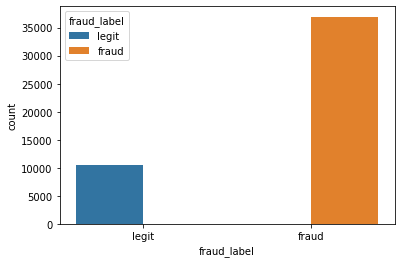

In [11]:
#Prikaz brojčanog odnosa labele
plt.figure()
sns.countplot(x='fraud_label', hue='fraud_label',data=podaci)

Vizuelizacijom obeležja država vidimo da preovlađuju podaci koji potiču iz Rusije, odakle ima najviše podataka o prevarama, ali i legitimnim transakcijama. Za njom prednjače i Brazil, Meksiko, Turska, SAD i druge, od kojih je velika većina u znatno malom broju.

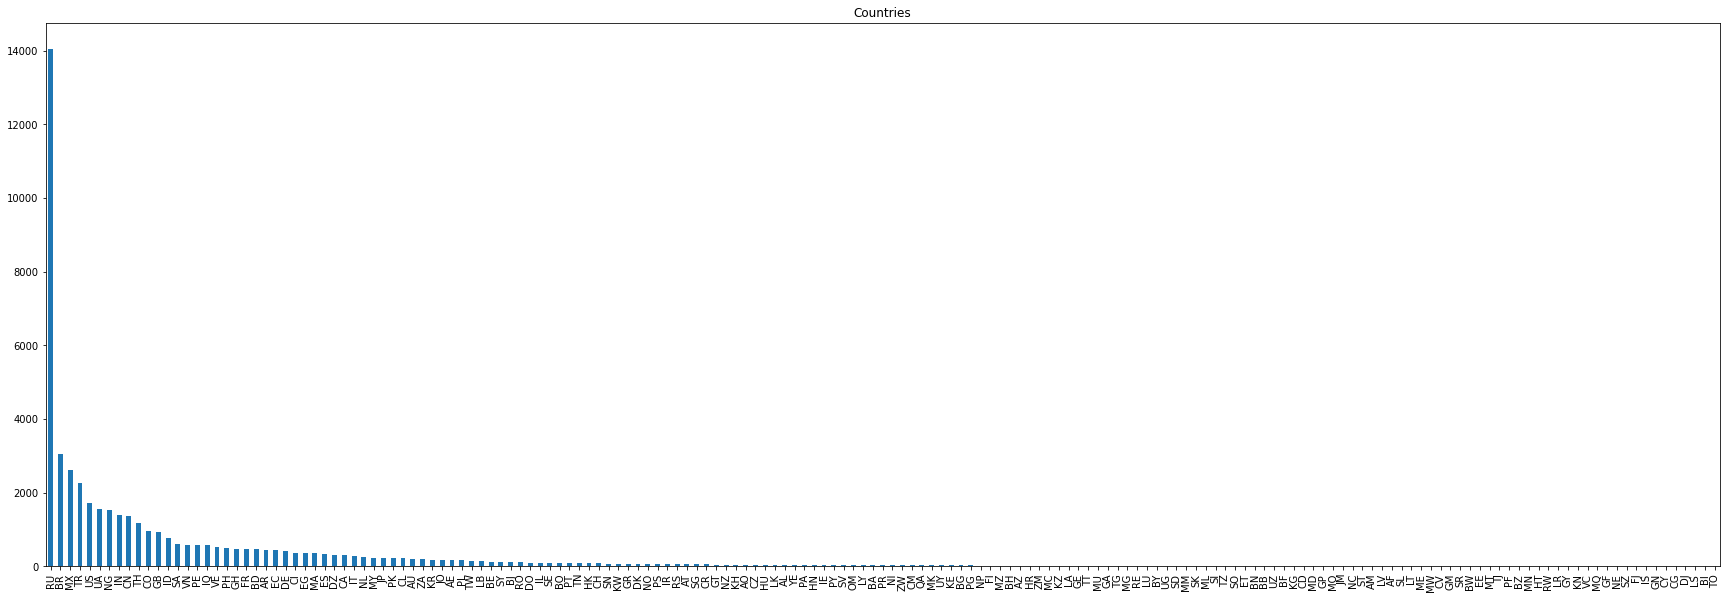

In [12]:
#Prikaz obeležja koje govori o udelu podataka po državama
plt.subplot()
podaci['country_iso2'].value_counts().plot(kind='bar', title='Countries', figsize=(30,10))

Uvidom u podatke o kontinentima vidimo da se najviše podataka nalazi u Severnoj Americi, a zatim u Aziji i Južnoj Americi, dok preostala tri kontinenta imaju manje prisustvo, ali srazmerno ostalim podacima, osim kada je reč o Okeaniji, koja ima znatno manje. Ovo je slučaj sa oba obeležja u okviru dve grupe koje posmatramo. Kada posmatramo vremenske zone, najviše podataka imamo u vremenskim zonama -5 i -6 koje se prostiru duž američkog kontinenta pretežno, dok ostale zone imaju uticaja, ali manje od prve dve. Tip konekcije nam govori o tome da je polovina tipova konekcije zastupljena u velikom broju. Posmatrajući obeležje linijske brzine vidimo da je najviše podataka zastupljeno u srednjoj brzini, dok su ostale brzine podjednako malo zastupljene. Ovde bi se mogao razmotriti pristup grupisanja preostale tri kategorije u jednu, čime bismo dobili samo dve kategorije kada je u pitanju ovo obeležje.

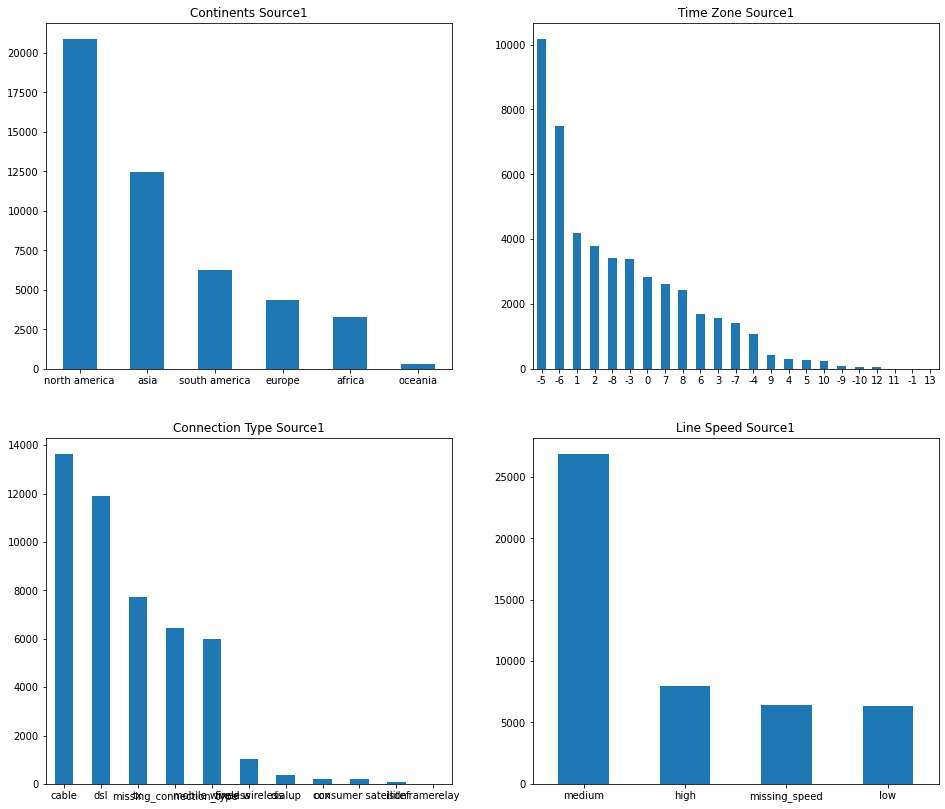

In [13]:
#Prikaz obeležja kontinenata, vremenske zone, tipa konekcije i linijske brzine
plt.subplot(221)
podaci['continent_source1'].value_counts().plot(kind='bar', title='Continents Source1', figsize=(16,14))
plt.xticks(rotation=0)
plt.subplot(222)
podaci['time_zone_source1'].value_counts().plot(kind='bar', title='Time Zone Source1', figsize=(16,14))
plt.xticks(rotation=0)
plt.subplot(223)
podaci['connection_type_source1'].value_counts().plot(kind='bar', title='Connection Type Source1', figsize=(16,14))
plt.xticks(rotation=0)
plt.subplot(224)
podaci['line_speed_source1'].value_counts().plot(kind='bar', title='Line Speed Source1', figsize=(16,14))
plt.xticks(rotation=0)
plt.show()

Najviše podataka imamo iz organizacija Internet Service Provider i Telecommunications, ali i znatno veliki broj missing values kada je u pitanju ovo obeležje dok ostale organizacije zauzimaju jako mali broj primera, stoga ovo obeležje nije nešto preterano informativno.

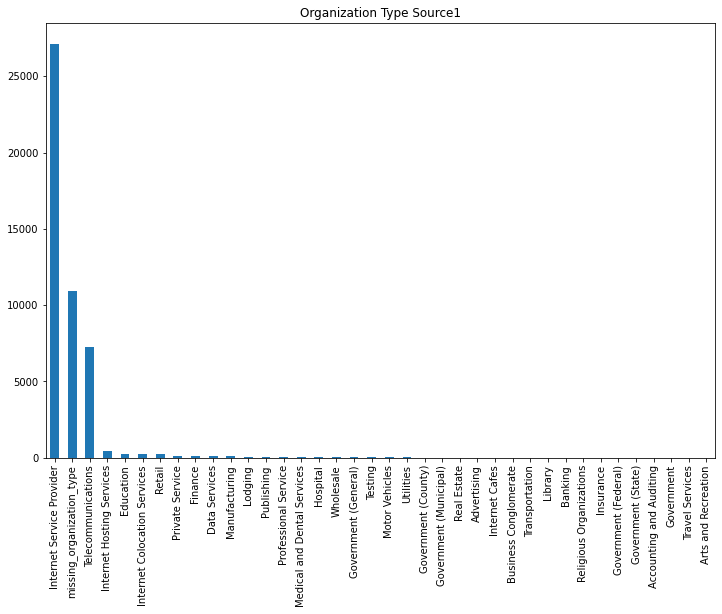

In [14]:
#Prikaz obeležja tipa organizacije
plt.subplot()
podaci['organization_type_source1'].value_counts().plot(kind='bar', title='Organization Type Source1', figsize=(12,8))

#Bivarijantna analiza obeležja

Bivarijantna analiza obeležja obuhvata posmatranje odnosa između dva obeležja.

Vizuelizacijom obeležja u 2D prostoru različitih parova obeležja obe grupe dolazimo do uvida u rasprostranjenost podataka i zaključka da klase nisu linearno separabilne, već da postoji neka druga kompleksnija zavisnost koja se ne može uočiti golim okom posmatranjem problema na 2D nivou, zato pristupamo daljoj obradi obeležja i njihovoj pripremi za dalji rad.

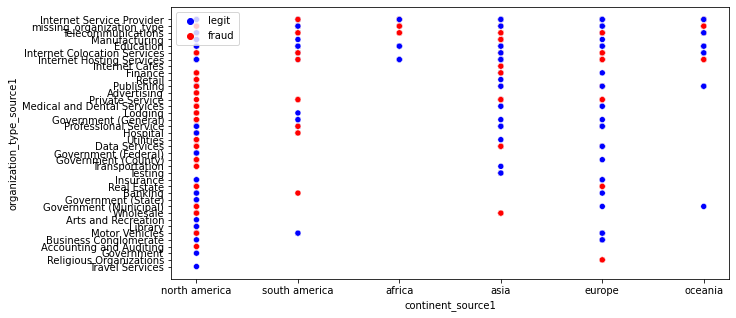

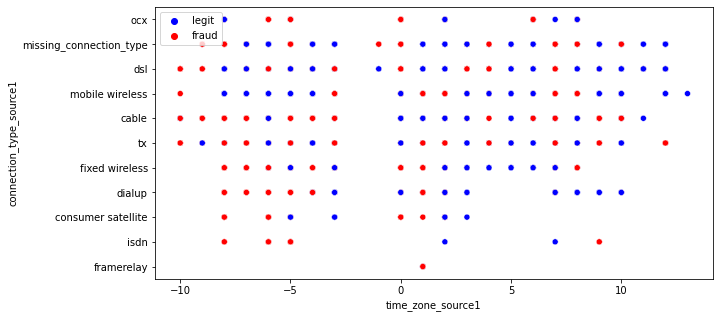

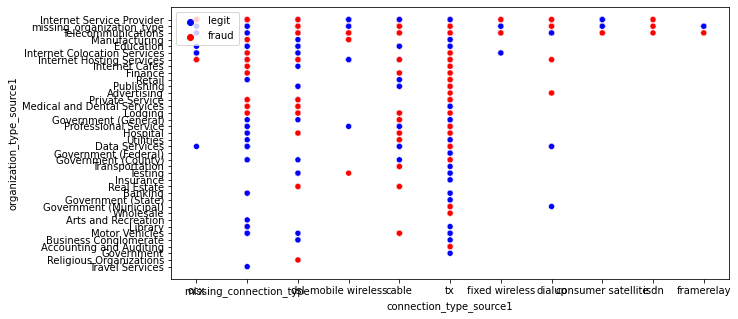

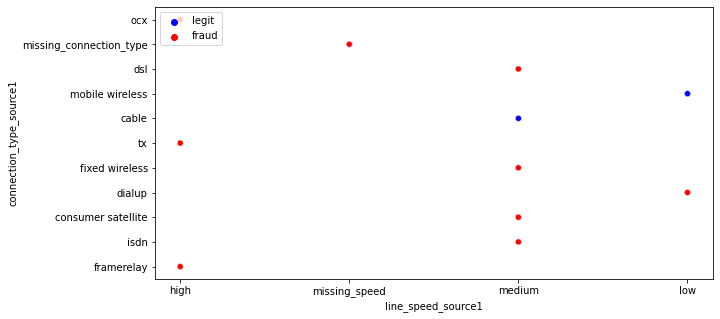

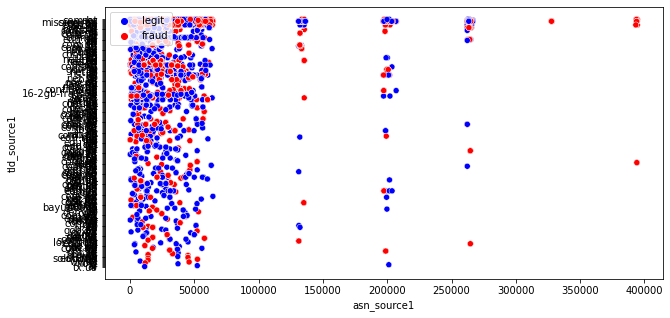

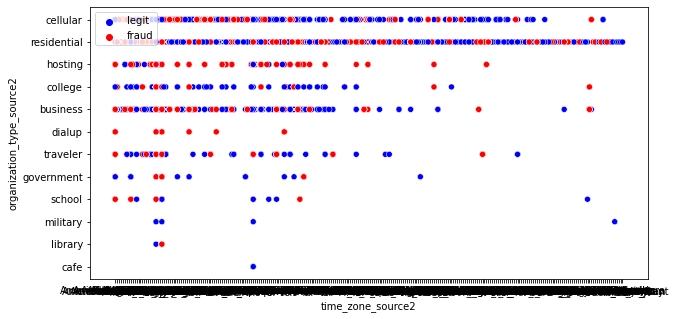

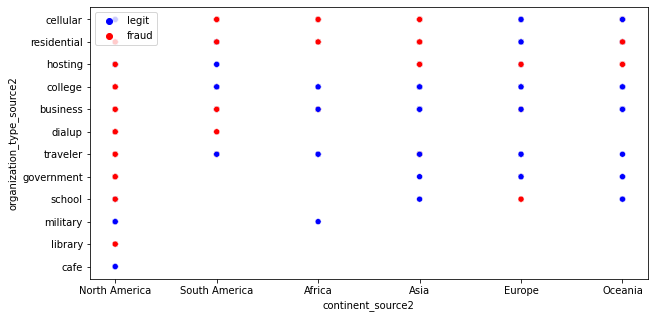

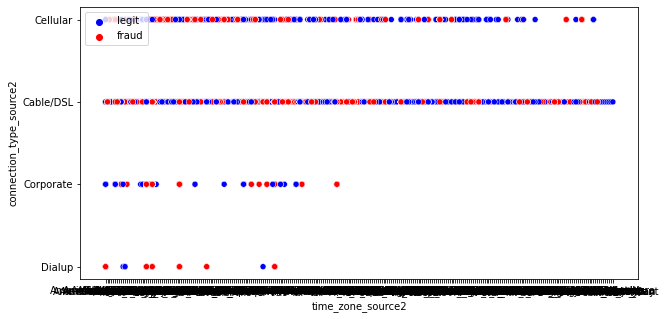

In [15]:
#2D prikaz parova obeležja radi uvida u kompleksnost problema

#Kontinenti i tipovi organizacije source1
podaciplot=pd.DataFrame({'continent_source1':podaci['continent_source1'], 'organization_type_source1':podaci['organization_type_source1'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='continent_source1',y='organization_type_source1',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

#Vremenska zona i tip konekcije source1
podaciplot=pd.DataFrame({'time_zone_source1':podaci['time_zone_source1'], 'connection_type_source1':podaci['connection_type_source1'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='time_zone_source1',y='connection_type_source1',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

#Tip konekcije i tipovi organizacija source1
podaciplot=pd.DataFrame({'connection_type_source1':podaci['connection_type_source1'], 'organization_type_source1':podaci['organization_type_source1'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='connection_type_source1',y='organization_type_source1',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

#Linijska brzina i tip konekcije source1
podaciplot=pd.DataFrame({'line_speed_source1':podaci['line_speed_source1'], 'connection_type_source1':podaci['connection_type_source1'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='line_speed_source1',y='connection_type_source1',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

#asn i tld source1
podaciplot=pd.DataFrame({'asn_source1':podaci['asn_source1'], 'tld_source1':podaci['tld_source1'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='asn_source1',y='tld_source1',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

#Vremenska zona i tipovi organizacija source1 source2
podaciplot=pd.DataFrame({'time_zone_source2':podaci['time_zone_source2'], 'organization_type_source2':podaci['organization_type_source2'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='time_zone_source2',y='organization_type_source2',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

#Kontinenti i tipovi organizacija source2
podaciplot=pd.DataFrame({'continent_source2':podaci['continent_source2'], 'organization_type_source2':podaci['organization_type_source2'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='continent_source2',y='organization_type_source2',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

#Vremenska zona i tip konekcija source2
podaciplot=pd.DataFrame({'time_zone_source2':podaci['time_zone_source2'], 'connection_type_source2':podaci['connection_type_source2'],'label': podaci['fraud_label']})

fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x='time_zone_source2',y='connection_type_source2',hue = 'label',data=podaciplot,legend='full',
                     palette = {'fraud':'red','legit':'blue'})
ax.legend(loc='upper left')

Nakon analize podataka i njihove predobrade, vrši se podela podataka na dve grupe obeležja, source1 i source2, gde vreme i country_iso2 predstavljanju zajednička obeležja za obe grupe.

In [ ]:
#Podela podataka na dve grupe obeležja i kastovanje country_cl_source2 obeležja u float64
podaci1=podaci[['fraud_label','utc_time_stamp','country_iso2','start_ip_source1','end_ip_source1','continent_source1','country_cl_source1','state_cl_source1','city_cl_source1','time_zone_source1','home_source1','connection_type_source1','line_speed_source1','ip_routing_type_source1','asn_source1','organization_type_source1','tld_source1','hosting_facility_source1']]
podaci2=podaci[['fraud_label','utc_time_stamp','country_iso2','continent_source2','country_cl_source2','city_cl_source2','time_zone_source2','connection_type_source2','asn_source2','organization_type_source2','proxy_is_legitimate_source2','proxy_is_anonymous_source2','proxy_is_anonymous_vpn_source2','proxy_is_hosting_provider_source2','proxy_is_public_source2','proxy_is_tor_source2']]
podaci2['country_cl_source2']=podaci2['country_cl_source2'].astype(np.float)

# Procesiranje obeležja prve i druge grupe i njihova priprema za korišćenje u modelima.

Iz obeležja koje nosi informaciju o vremenu i datumu transakcije izvlačimo informaciju o satu u kom se izvršava transakcija, imajući na umu da se fraud transakcije najčešće dešavaju u satima koji nisu predviđeni za to. Ovo obeležje je zajedničko za obe grupe obeležja. Ono što bi mogla biti dalja obrada kada je u pitanju ovo obeležje je izdvajanje informacija o drugim vremenskim periodima kao što su dani u nedelji, kvartali u godini, meseci, godine, pa proveriti da li neko od takvih obeležja nosi dovoljnu količinu informacija. Iz razloga vremenskog ograničenja, posamtran je samo slučaj kada je u pitanju sat transakcije. Iz date informacije o datumu i vremenu izvlači se sat pri čemu dobija format int broja.

In [ ]:
#Obrada podataka o vremenu i pravljenje veštačkog obeležja koje označava sat u kome se vrši transakcija
vreme=podaci['utc_time_stamp']
vreme=np.array(vreme)

#Ako je sat 0x, uzima se samo drugi broj, ako je xx, uzimaju se oba
for i in range(0,len(vreme)):
  if vreme[i][11]=='0':
    vreme[i]=vreme[i][12]
  else:
    vreme[i]=vreme[i][11:13]

#Dodavanje veštačkog obeležja obema grupama 
vreme=vreme.astype(np.int)
podaci1['hour']=vreme
podaci2['hour']=vreme

#Učitavanje biblioteke za enkodiranje obeležja
from sklearn.preprocessing import LabelEncoder

#Enkodiranje labele y u oblik 0/1
labelencoder_y = LabelEncoder()
podaci1['fraud_label']= labelencoder_y.fit_transform(podaci1['fraud_label'])
podaci2['fraud_label']= labelencoder_y.fit_transform(podaci2['fraud_label'])

Obeležju koje govori o državama u kojima se dešavaju transakcije dajemo labele od 1 do 171 sudeći po tome da postoji 171 različita država u našem setu podataka, pa samim tim izbacujemo prvobitna obeležja o ISO2 nazivima zemalja i dodajemo svakoj od njih posebnu labelu, čime umesto ovog obeležja dobijamo int obeležje. Ovaj postupak radi se enkodiranjem uz pomoć funkcije LabelEncoder().

In [ ]:
#Enkodiranje obeležja o informacijama o državama vrednostima 1-171
countries = np.unique(podaci1['country_iso2'])
enkoder = LabelEncoder()
country_labels = enkoder.fit_transform(podaci1['country_iso2'])

#Dodavanje novog obeležja podacima
podaci1['country_iso2_labels']=country_labels
podaci2['country_iso2_labels']=country_labels

#Odbacivanje iskorišćenih obeležja koja više nisu upotrebljiva
podaci1.drop('country_iso2',axis=1,inplace=True)
podaci2.drop('country_iso2',axis=1,inplace=True)
podaci1.drop('utc_time_stamp',axis=1,inplace=True)
podaci2.drop('utc_time_stamp',axis=1,inplace=True)

Od obeležja start_ip i end_ip pravimo veštačko obeležje koje nam govori o razlici IP adresa, pa samim tim od prvobitna dva obeležja dobijamo jedno obeležje, dok dva stara obeležja izbacujemo iz dalje upotrebe. Ovaj postupak se radi tako što se stringovi koji govore o IP adresama razdvoje po tačkama pri čemu se IP adrese oduzimaju, gde svaki novi nivo adrese nosi težinu od 256 sa sobom. Ovakvom obradom dolazi se do novog obeležja, dok se dva stara obeležja izbacuju iz dalje obrade.

In [ ]:
#Pravljenje veštačkog obeležja uz pomoć krajnje i startne IP adrese
startip=podaci1['start_ip_source1']
endip=podaci1['end_ip_source1']
startip=np.array(startip)
endip=np.array(endip)

#Razlika u IP adresama
sub=np.empty(shape=(len(endip)))

#Računa se razlika u IP adresama i čuva kao novo obeležje
for i in range(0,len(startip)):
  start1=np.array(startip[i].split('.'))
  end1=np.array(endip[i].split('.'))
  start1=start1.astype(np.int)
  end1=end1.astype(np.int)
  sub[i]=end1[3]-start1[3]+256*(end1[2]-start1[2])+256*256*(end1[1]-start1[1])+256*256*256*(end1[0]-start1[0])

#Čuva se novo obeležje i brišu dva stara koja su iskorišćena
podaci1['ip_sub']=sub
podaci1.drop(['start_ip_source1','end_ip_source1'],axis=1,inplace=True)

Od kategoričkog obeležja koje nosi informacije o kontinentima pravimo 6 novih binarnih obeležja u zavisnosti od toga na kom kontinentu se dogodila transakcija, dok staro obeležje izbacujemo.

In [ ]:
#Od obeležja kontinenata pravi se 6 novih binarnih obeležja koja označavaju kontinente
continent=podaci1[['continent_source1']]
top46=[x for x in podaci1.continent_source1.value_counts().sort_values(ascending=False).head(6).index]
for label in top46:
    continent[label]=np.where(podaci1['continent_source1']==label,1,0)
continent.drop(['continent_source1'],axis=1,inplace=True)

#Brisanje obeležja kontinenata i dodavanje novih obeležja
podaci1.drop('continent_source1',axis=1,inplace=True)
podaci1=pd.concat([podaci1,continent],axis=1)

Uz pomoć kodiranja labela, obeležje home_source1 kome smo prvobitno dodelili vrednosti -1 za nedostajuce vrednosti, menjamo oblik tako da dobijamo vrednosti 1 za True, 0 za False i -1 za missing values, odnosno vrednosti 2, 1 i 0.

In [21]:
#Transformacija obeležja u oblika 1/0/-1 odnosno 2/1/0
podaci1['home_source1']= labelencoder_y.fit_transform(podaci1['home_source1'])

Od obeležja koje nosi informaciju o tipu konekcije pravimo 11 novih obeležja u zavisnosti od tipa konekcije koji se koristi pri transakciji kao OneHotCoding, a staro obeležje izbacujemo iz upotrebe. Takođe, od obeležja linijske brzine pravimo 4 nova obeležja, a i za obeležje za tip ip rutiranja 7 novih obeležja.

In [ ]:
#Pravljenje novih binarnih obeležja od obeležja tipa konekcije
connection_type=podaci1[['connection_type_source1']]
top46=[x for x in podaci1.connection_type_source1.value_counts().sort_values(ascending=False).head(11).index]
for label in top46:
    connection_type[label]=np.where(podaci1['connection_type_source1']==label,1,0)
connection_type.drop(['connection_type_source1'],axis=1,inplace=True)

#Brisanje starog obeležja i dodavanja novog
podaci1.drop('connection_type_source1',axis=1,inplace=True)
podaci1=pd.concat([podaci1,connection_type],axis=1)

#Pravljenje novih binarnih obeležja od obeležja linijske brzine
line_speed=podaci1[['line_speed_source1']]
top46=[x for x in podaci1.line_speed_source1.value_counts().sort_values(ascending=False).head(4).index]
for label in top46:
    line_speed[label]=np.where(podaci1['line_speed_source1']==label,1,0)
line_speed.drop(['line_speed_source1'],axis=1,inplace=True)

#Brisanje starog obeležja i dodavanja novog
podaci1.drop('line_speed_source1',axis=1,inplace=True)
podaci1=pd.concat([podaci1,line_speed],axis=1)

#Pravljenje novih binarnih obeležja od obeležja IP routing tipa
ip_routing=podaci1[['ip_routing_type_source1']]
top46=[x for x in podaci1.ip_routing_type_source1.value_counts().sort_values(ascending=False).head(7).index]
for label in top46:
    ip_routing[label]=np.where(podaci1['ip_routing_type_source1']==label,1,0)
ip_routing.drop(['ip_routing_type_source1'],axis=1,inplace=True)

#Brisanje starog obeležja i dodavanja novog
podaci1.drop('ip_routing_type_source1',axis=1,inplace=True)
podaci1=pd.concat([podaci1,ip_routing],axis=1)

Tipu organizacije dodeljujemo labele, kao i tld_source1 obeležju, dok hosting facility obeležje prebacujemo iz bool tipa u binarno obeležje tipa int.

In [23]:
#Enkodiranje obeležja tipa organizacije u jedno int obeležje sa opsegom brojeva
organization_type = np.unique(podaci1['organization_type_source1'])
enkoder = LabelEncoder()
organization_type_labels = enkoder.fit_transform(podaci1['organization_type_source1'])
podaci1['organization_type_labels']=organization_type_labels
podaci1.drop('organization_type_source1',axis=1,inplace=True)

#Enkodiranje obeležja tld u jedno int obeležje sa opsegom brojeva
tld = np.unique(podaci1['tld_source1'])
enkoder = LabelEncoder()
tld_labels = enkoder.fit_transform(podaci1['tld_source1'])
podaci1['tld_labels']=tld_labels
podaci1.drop('tld_source1',axis=1,inplace=True)

#Enkodiranje bool obeležja u binarno obeležje
podaci1['hosting_facility_source1']= enkoder.fit_transform(podaci1['hosting_facility_source1'])

Nakon obrade svih obeležja prve grupe sledi prikaz i uvid u novonastala numerička obeležja.

In [24]:
#Prikaz podataka prve grupe obeležja
podaci1.head()

,fraud_label,country_cl_source1,state_cl_source1,city_cl_source1,time_zone_source1,home_source1,asn_source1,hosting_facility_source1,hour,country_iso2_labels,ip_sub,north america,asia,south america,europe,africa,oceania,cable,dsl,tx,missing_connection_type,mobile wireless,fixed wireless,dialup,consumer satellite,ocx,isdn,framerelay,medium,high,missing_speed,low,fixed,missing_ip_routing_type,mobile gateway,pop,satellite,regional proxy,international proxy,organization_type_labels,tld_labels
0,1,0.99,0.95,0.90,-6,2,10507,0,0,161,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,19,187
1,0,0.99,0.80,0.61,-3,0,263553,0,0,20,19.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,37,63
2,1,0.86,0.68,0.50,2,0,24863,0,0,44,3583.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,37,176
3,1,0.95,0.23,0.23,8,1,9674,0,0,157,12287.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,31,187
4,0,0.99,0.95,0.90,-3,0,52980,0,0,20,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,37,176


Sličan postupak ponavljamo i za obeležja druge grupe. Pravimo nova binarna obeležja od kontinenata, enkodiramo obeležje o vremenskim zonama i tipu organizacije i pravimo nova binarna obeležja od obeležja tipa konekcije.

In [ ]:
#Pravljenje novih binarnih obeležja od obeležja kontinenata
continent=podaci2[['continent_source2']]
top46=[x for x in podaci2.continent_source2.value_counts().sort_values(ascending=False).head(6).index]
for label in top46:
    continent[label]=np.where(podaci2['continent_source2']==label,1,0)
continent.drop(['continent_source2'],axis=1,inplace=True)

#Brisanje starog obeležja i dodavanja novog
podaci2.drop('continent_source2',axis=1,inplace=True)
podaci2=pd.concat([podaci2,continent],axis=1)

#Enkodiranje obeležja vremenske zone u opseg brojeva
time_zone = np.unique(podaci2['time_zone_source2'])
enkoder = LabelEncoder()
time_zone_labels = enkoder.fit_transform(podaci2['time_zone_source2'])
podaci2['time_zone_labels']=time_zone_labels
podaci2.drop('time_zone_source2',axis=1,inplace=True)

#Pravljenje novih binarnih obeležja od obeležja tipa konekcije
connection_type=podaci2[['connection_type_source2']]
top46=[x for x in podaci2.connection_type_source2.value_counts().sort_values(ascending=False).head(4).index]
for label in top46:
    connection_type[label]=np.where(podaci2['connection_type_source2']==label,1,0)
connection_type.drop(['connection_type_source2'],axis=1,inplace=True)

#Brisanje starog obeležja i dodavanja novog
podaci2.drop('connection_type_source2',axis=1,inplace=True)
podaci2=pd.concat([podaci2,connection_type],axis=1)

#Enkodiranje obeležja tipa organizacije u opseg brojeva
organization_type = np.unique(podaci2['organization_type_source2'])
enkoder = LabelEncoder()
organization_type_labels = enkoder.fit_transform(podaci2['organization_type_source2'])
podaci2['organization_type_labels']=organization_type_labels
podaci2.drop('organization_type_source2',axis=1,inplace=True)

Nakon obrade svih obeležja druge grupe sledi prikaz i uvid u novonastala numerička obeležja.

In [26]:
#Prikaz podataka druge grupe obeležja
podaci2.head()

,fraud_label,country_cl_source2,city_cl_source2,asn_source2,proxy_is_legitimate_source2,proxy_is_anonymous_source2,proxy_is_anonymous_vpn_source2,proxy_is_hosting_provider_source2,proxy_is_public_source2,proxy_is_tor_source2,hour,country_iso2_labels,North America,Asia,South America,Europe,Africa,Oceania,time_zone_labels,Cable/DSL,Cellular,Corporate,Dialup,organization_type_labels
0,1,0.99,0.20,10507.0,0,0,0,0,0,0,0,161,1,0,0,0,0,0,69,0,1,0,0,2
1,0,0.99,0.80,263553.0,0,0,0,0,0,0,0,20,0,0,1,0,0,0,118,1,0,0,0,9
2,1,0.80,0.80,24863.0,0,0,0,0,0,0,0,44,0,0,0,0,1,0,9,1,0,0,0,9
3,1,0.70,0.01,9674.0,0,0,0,0,0,0,0,157,0,1,0,0,0,0,181,0,1,0,0,2
4,0,0.99,0.60,52980.0,0,0,0,0,0,0,0,20,0,0,1,0,0,0,118,1,0,0,0,9


# Korelaciona matrica obeležja

Kada imamo posla sa velikim brojem obeležja, poželjno je ispitati samu informativnost obeležja i doći do nekih korisnih zaključaka kada su ona u pitanju. Postoji više algoritama za feature selection, kao što su omotač algoritmi, rangirajući algoritmi i drugi, a ovog puta će biti reč o rangirajućim algoritmima. Najpre će biti prikazana korelaciona matrica obeležja radi uvida u njihovu zavinost. Ona obeležja koja po apsolutnoj vrednosti imaju koeficijent korelacije veći ili jednak od 0.8 biće razmatrana za izbacivanje. Obeležja koja imaju veliki koeficijent korelacije nose jako slične informacije i samu količinu informacija, stoga je jedno od dva obeležja u paru sa velikim koeficijentom korelacije višak. Odlučivanje koje obeležje treba izbaciti iz dalje upotrebe zasniva na na međusobnoj informaciji između obeležja i izlazne labele. Ono obeležje iz para koje ima veću međusobnu informaciju će ostati, a ono drugo će biti izbačeno. Na ovaj način izbacujemo jako korelisana obeležja. Razlog što se koristi međusobna informacija je taj što sam koeficijent korelacije između obeležja i izlazne labele daje informaciju o linearnoj zavisnosti, a međusobna informacija daje informaciju o bilo kojoj zavisnosti i raspodeli, jer ona zapravo i ispituje raspodele podataka, odnosno njihovu sličnost.

Prva grupa obeležja

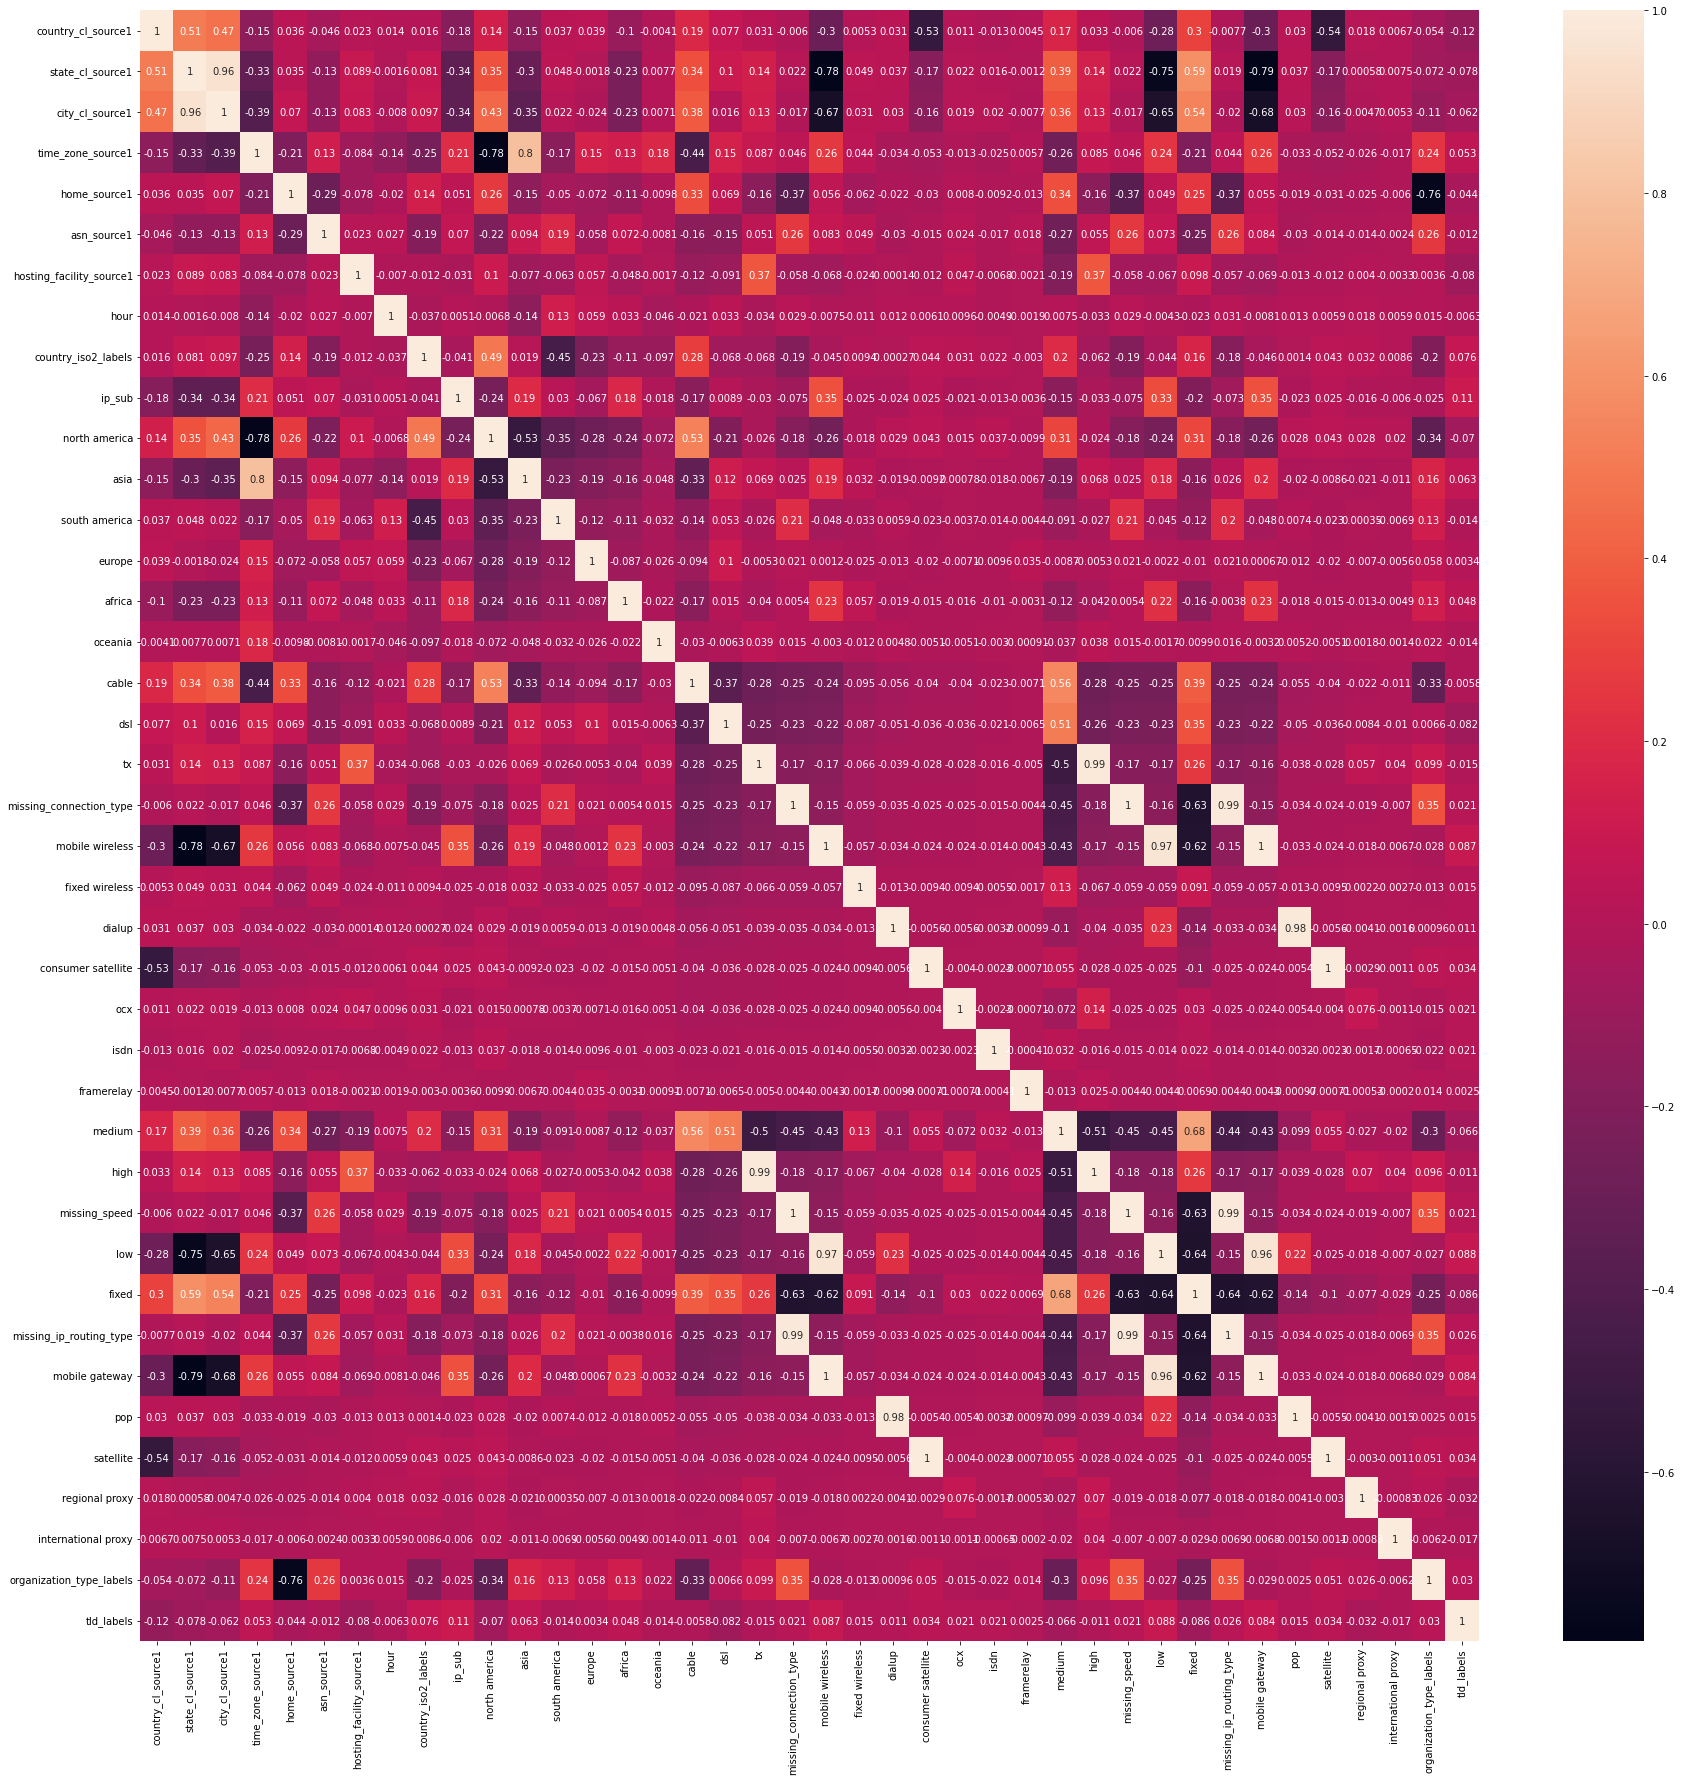

In [27]:
#Razdvajanje na labele i obeležja podataka prve grupe
y1=podaci1['fraud_label']
podaci1.drop('fraud_label',axis=1,inplace=True)
X1=podaci1

#Prikaz korelacione matrice
plt.figure(figsize = (30,30))
sns.heatmap(X1.corr(), annot = True)
plt.show()

Iz date matrice vidimo da postoje obeležja čija apsolutna vrednost koeficijenta korelacije iznosi preko 0.8. Potrebno je izbaciti odgovarajuća obeležja. Najpre ćemo imati uvid u vrednosti međusobne informacije između svakog obeležja i izlazne promenljive. Uzima se međusobna informacija pre nego korelacija između obeležja i izlaza jer gleda sve zavisnosti, a ne samo linearnu. Obeležje para sa velikom korelacijom koje će biti izbačeno je ono koje ima manju međusobnu informaciju sa izlaznom promenljivom.

In [28]:
#Biblioteka za računanje međusobne informacije
from sklearn.feature_selection import mutual_info_classif

#Prikaz izračunate međusobne informacije obeležja i izlaza
MI=mutual_info_classif(X1,y1,discrete_features = True)
print('Međusobna informacija obeležja i izlaza:')
print()
print(MI)

#Odbacivanje obeležja sa manjom MI od parova sa koeficijentom korelacije većim od 0.8 po apsolutnoj vrednosti
X1.drop(['city_cl_source1','asia','tx','missing_connection_type','low','mobile wireless','pop','satellite','missing_ip_routing_type'],axis=1,inplace=True)

Međusobna informacija obeležja i izlaza:

[4.31353194e-03 1.27514574e-02 1.12514414e-02 4.47063847e-02
 2.15238543e-03 1.79369435e-01 9.27091367e-04 6.47154652e-03
 1.14386221e-01 7.01546944e-02 3.68019881e-02 7.21391461e-03
 4.87366148e-03 9.83276528e-03 1.89650468e-04 5.43011999e-04
 1.88064877e-02 4.07829113e-04 9.20218119e-04 2.26419182e-03
 4.19679309e-03 1.31082262e-06 1.12766640e-05 3.13331632e-04
 1.34998659e-04 2.04651240e-04 5.66958061e-05 1.05197635e-02
 1.04237549e-03 2.26419182e-03 3.90635736e-03 7.58918434e-03
 2.12395577e-03 4.23749547e-03 8.17609740e-06 2.91026167e-04
 1.37681977e-03 3.70715072e-04 7.66341586e-03 4.93784093e-02]


Nakon izbacivanja obeležja, vrši se prikaz novonastale korelacione matrice i na osnovu međusobne informacije bira se 20 obeležja sa najvećom međusobnom korelacijom koja će se koristiti nadalje, dok će druga obeležja biti izbačena.

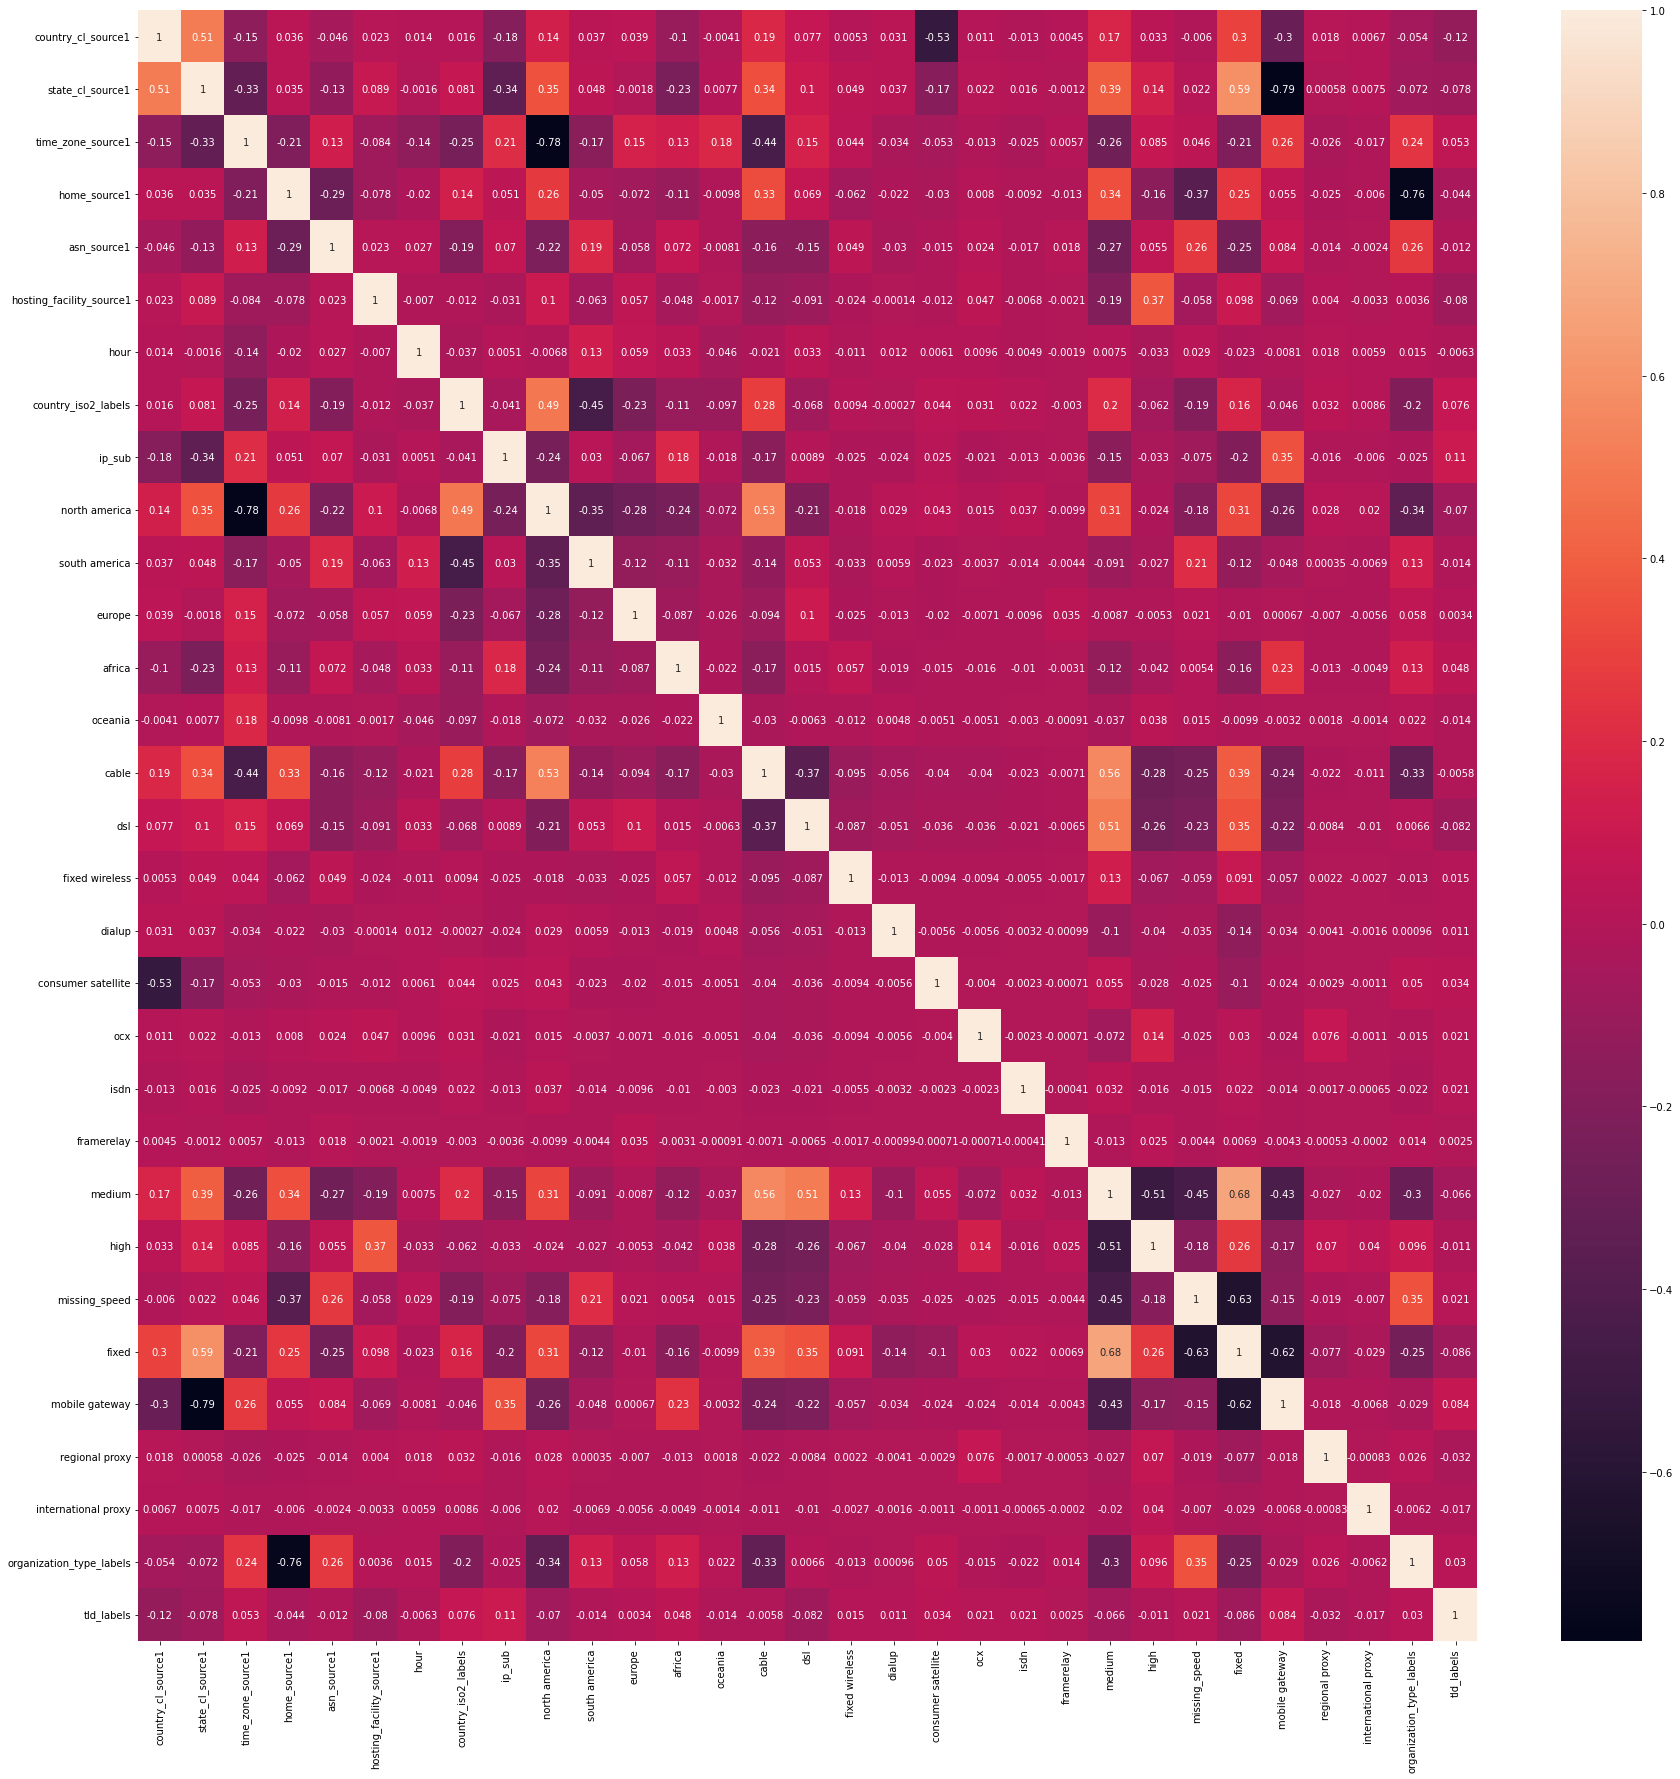

Sortirana lista međusobne informacije po indeksima u opadajućem redosledu: 
[ 5  8  9 31  3 10 15  2 23 12 30 26  7 11  1 27 25  4 28 24  6 14 16 29
 19 21 13 20 22 18 17]

Prikaz sortiranih vrednosti međusobne informacije obeležja i izlaza:
[1.79369435e-01 1.14386221e-01 7.01546944e-02 4.93784093e-02
 4.47063847e-02 3.68019881e-02 1.88064877e-02 1.27514574e-02
 1.05197635e-02 9.83276528e-03 7.66341586e-03 7.58918434e-03
 6.47154652e-03 4.87366148e-03 4.31353194e-03 4.23749547e-03
 2.26419182e-03 2.15238543e-03 1.37681977e-03 1.04237549e-03
 9.27091367e-04 5.43011999e-04 4.07829113e-04 3.70715072e-04
 3.13331632e-04 2.04651240e-04 1.89650468e-04 1.34998659e-04
 5.66958061e-05 1.12766640e-05 1.31082262e-06]


In [29]:
#Prikaz korelacione matrice
plt.figure(figsize = (30,30))
sns.heatmap(X1.corr(), annot = True)
plt.show()

#Računanje međusobne informacije i sortiranje obeležja po vrednosti MI
MI=mutual_info_classif(X1,y1,discrete_features = True)
print('Sortirana lista međusobne informacije po indeksima u opadajućem redosledu: ')
sorted_index=np.flip(np.argsort(MI))
print(sorted_index+1)
print()
print('Prikaz sortiranih vrednosti međusobne informacije obeležja i izlaza:')
print(MI[sorted_index])

#Od datih obeležja uzima se prvih 20 sa najvećom vrednošću MI
best_index=sorted_index[0:20]
X1=np.array(X1)
X1_final=X1[:,best_index]
y1_final=np.array(y1)

Druga grupa obeležja

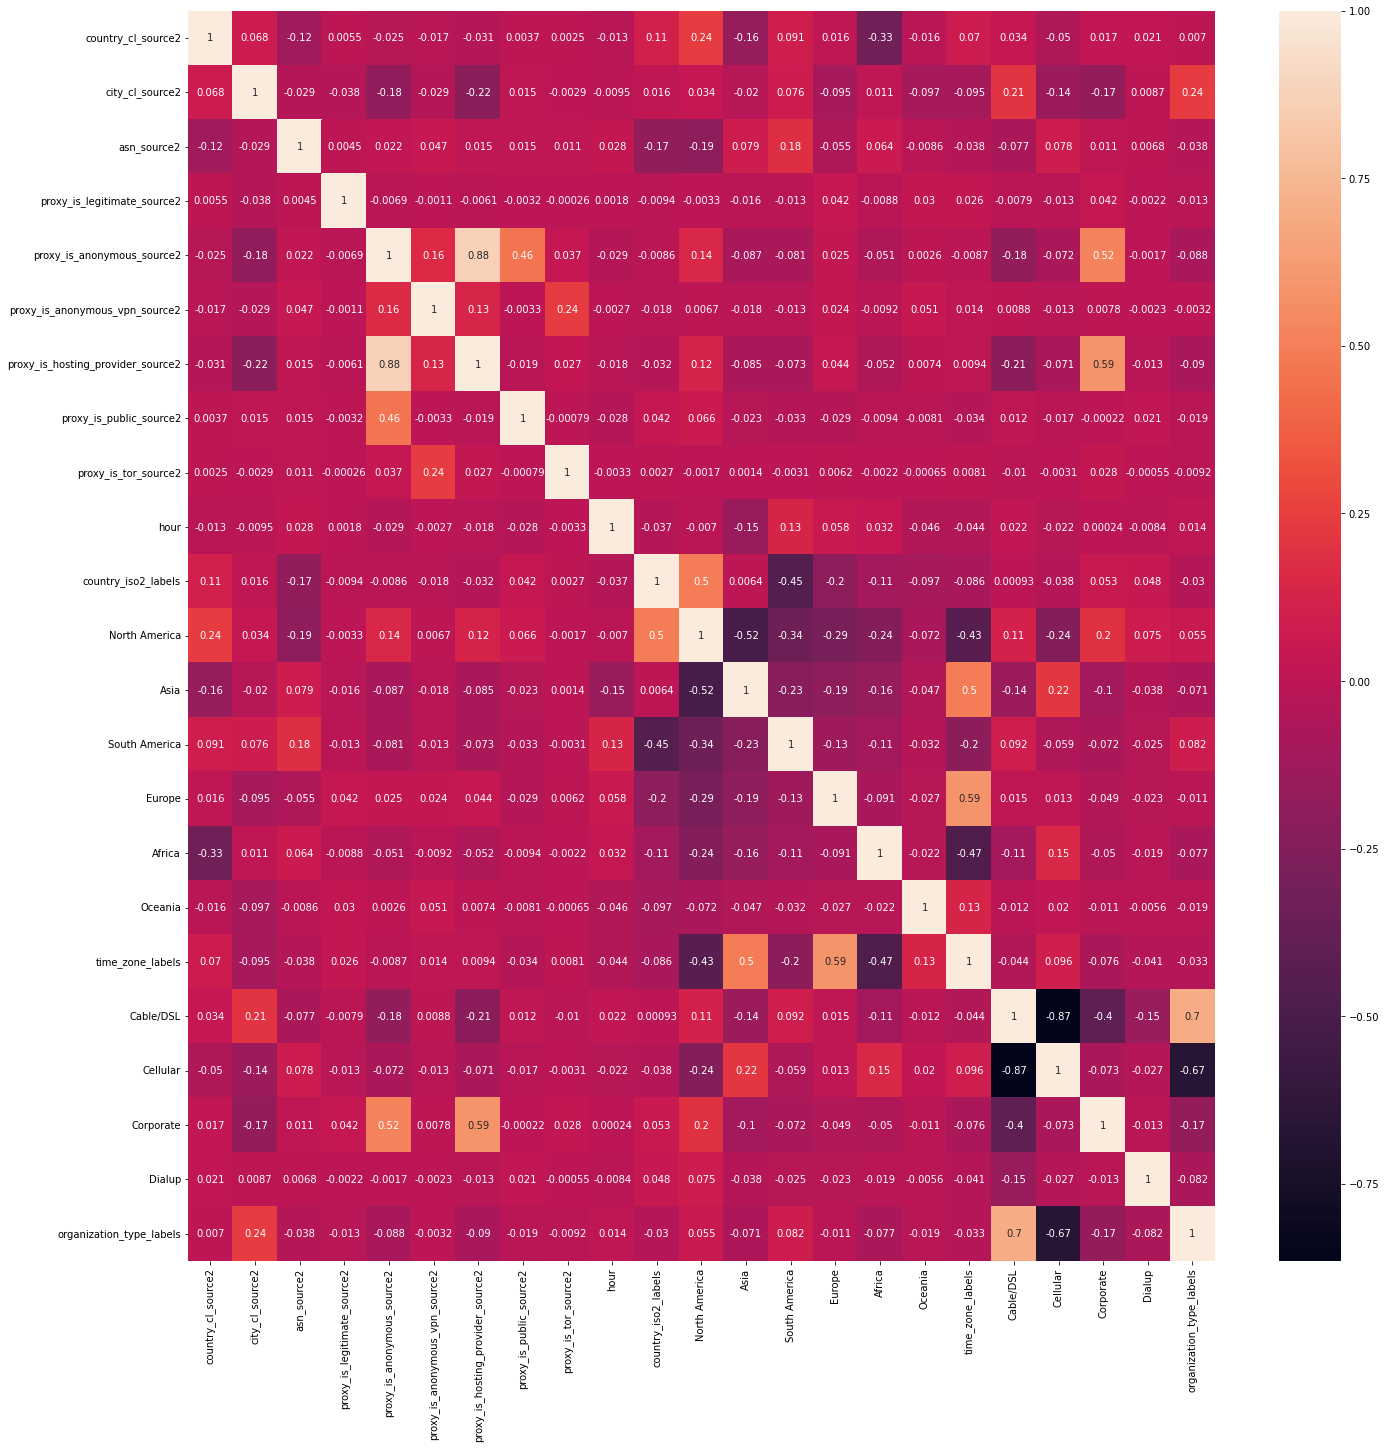

In [30]:
#Podela na labele i obeležja podataka druge grupe
y2=podaci2['fraud_label']
podaci2.drop('fraud_label',axis=1,inplace=True)
X2=podaci2

#Prikaz korelacione matrice
plt.figure(figsize = (23,23))
sns.heatmap(X2.corr(), annot = True)
plt.show()

Na osnovu korelacione matrice i međusobne informacije izbacujemo ona obeležja iz parova sa velikim koeficijentom sa manjom vrednošću međusobne informacije.

In [31]:
#Računanje međusobne informacije obeležja i izlaza
MI=mutual_info_classif(X2,y2,discrete_features = True)
print('Međusobna informacija obeležja i izlaza:')
print()
print(MI)

#Odbacivanje obeležja sa manjom MI od parova sa koeficijentom korelacije većim od 0.8 po apsolutnoj vrednosti
X2.drop(['Cellular','proxy_is_hosting_provider_source2'],axis=1,inplace=True)

Međusobna informacija obeležja i izlaza:

[1.01793048e-03 3.02007147e-03 1.79553315e-01 2.92681076e-04
 1.90070165e-03 1.09992675e-05 1.39801477e-03 4.59216061e-04
 1.58959830e-05 6.47154652e-03 1.14386221e-01 3.67621491e-02
 4.96099567e-03 4.88008200e-03 1.34473363e-02 1.91988340e-04
 5.44416493e-04 8.98518438e-02 3.13542215e-03 5.67281704e-03
 4.46804539e-04 6.44963004e-04 8.71228786e-03]


Prikazuje se konačna korelaciona matrica i na osnovu međusobne informacije bira se 13 najboljih obeležja, odnosno onih sa najvećom vrednošću međusobne informacije.

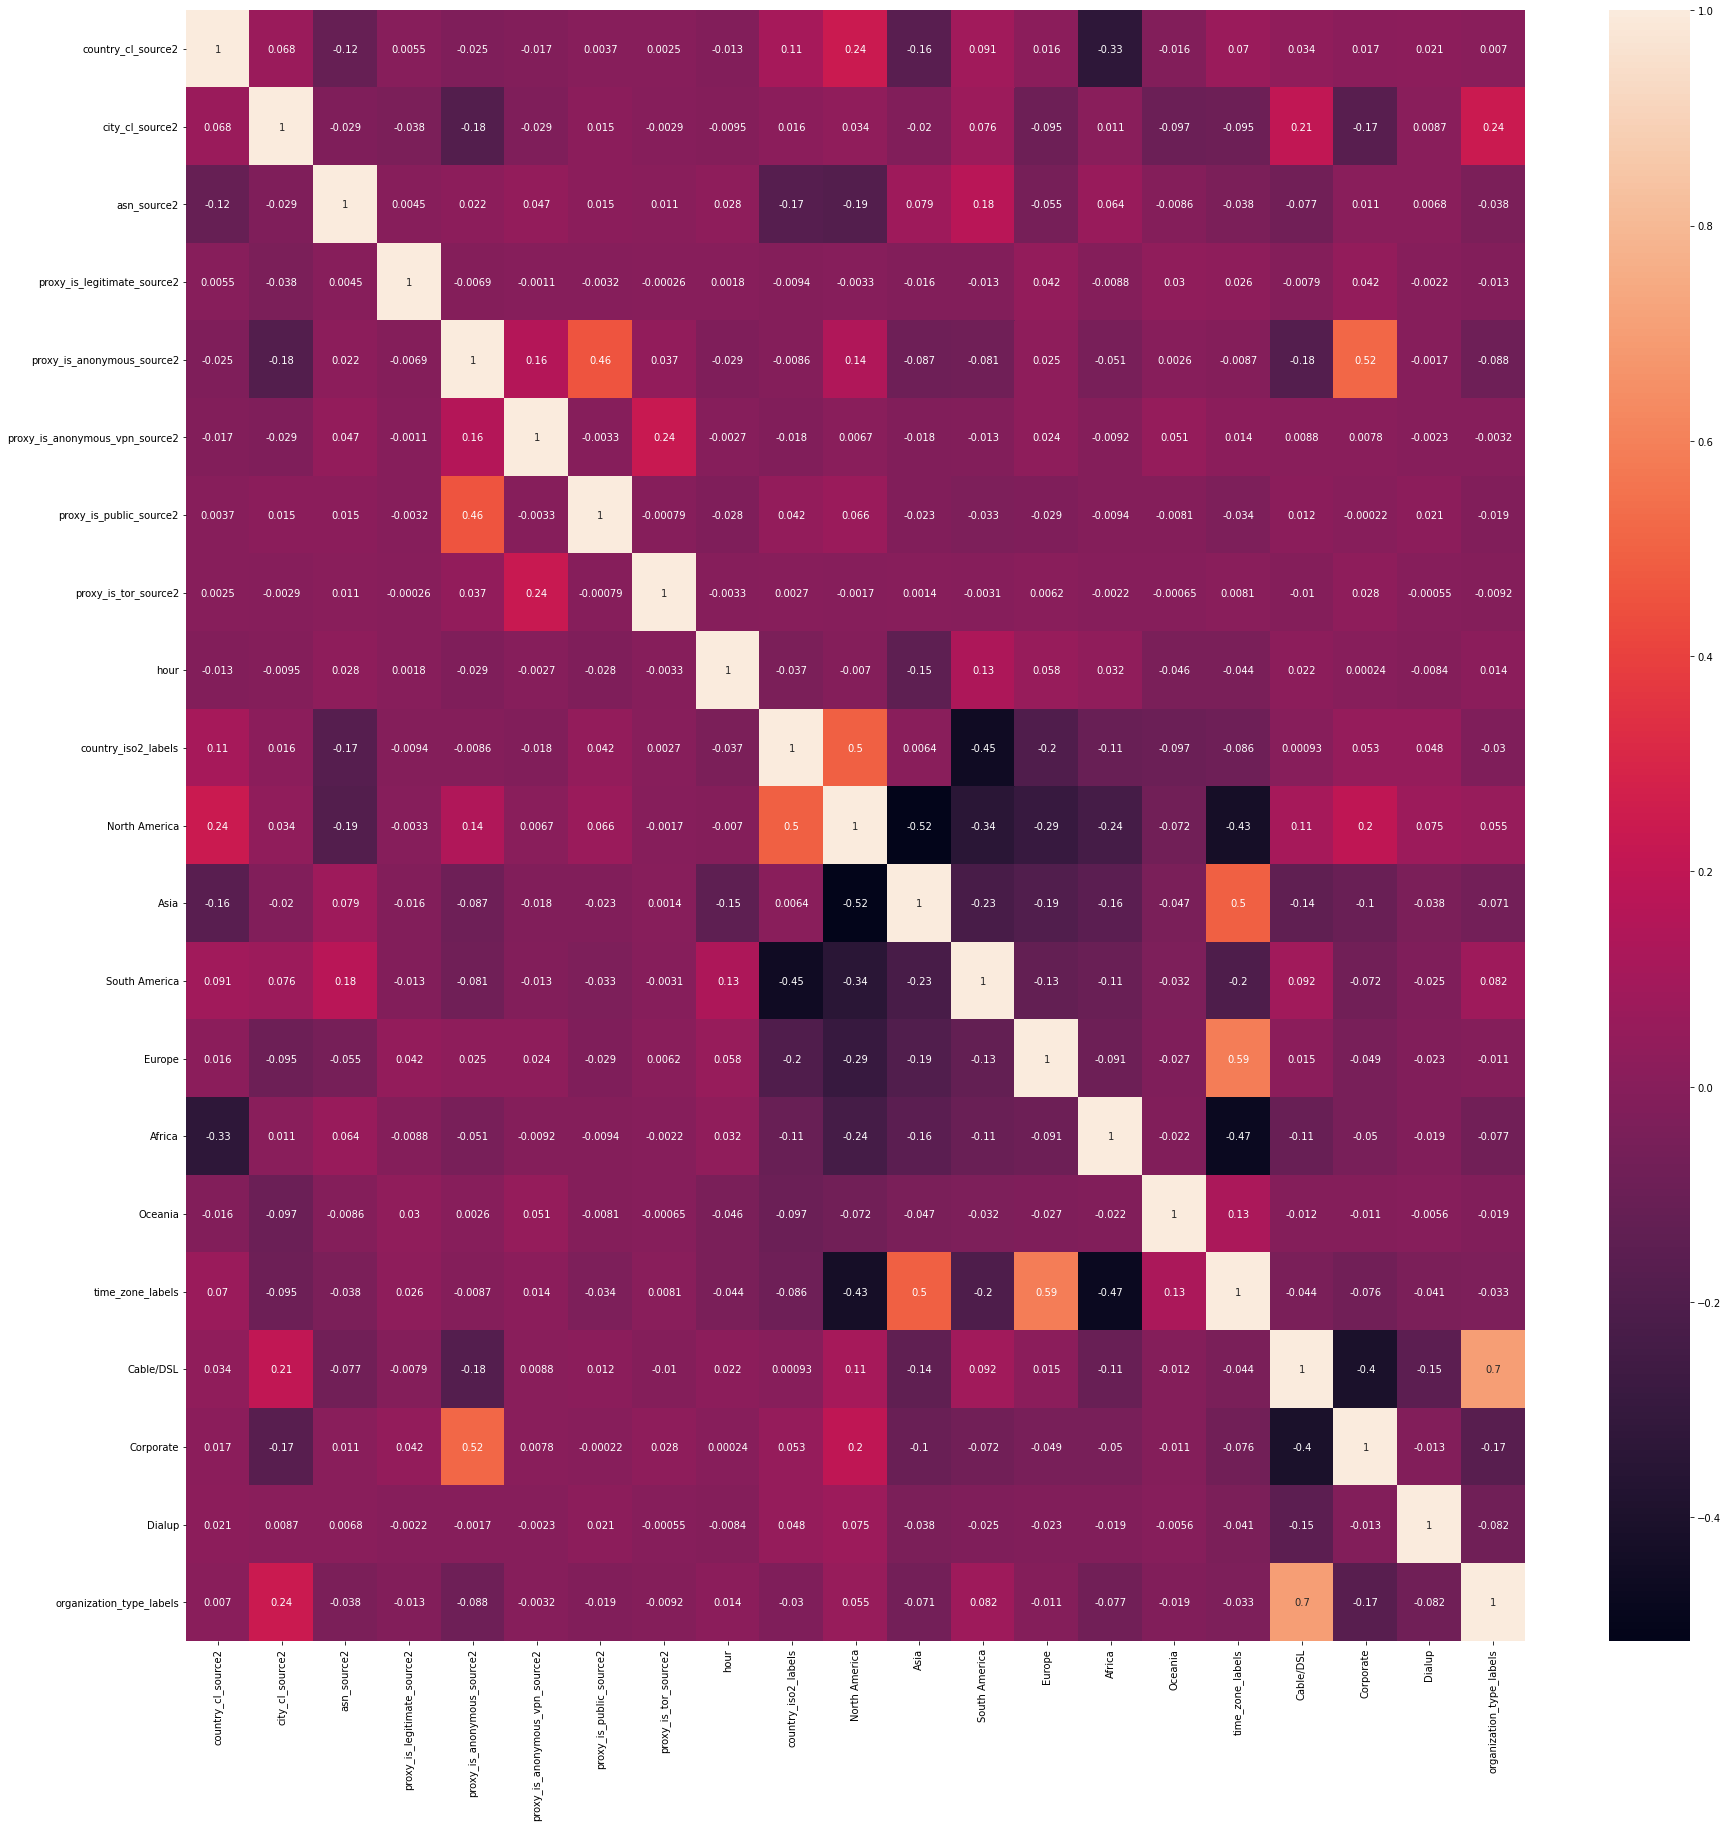

Sortirana lista međusobne informacije po indeksima u opadajućem redosledu: 
[ 3 10 17 11 14 21  9 12 13 18  2  5  1 20 16  7 19  4 15  8  6]

Prikaz sortiranih vrednosti međusobne informacije obeležja i izlaza:
[1.79553315e-01 1.14386221e-01 8.98518438e-02 3.67621491e-02
 1.34473363e-02 8.71228786e-03 6.47154652e-03 4.96099567e-03
 4.88008200e-03 3.13542215e-03 3.02007147e-03 1.90070165e-03
 1.01793048e-03 6.44963004e-04 5.44416493e-04 4.59216061e-04
 4.46804539e-04 2.92681076e-04 1.91988340e-04 1.58959830e-05
 1.09992675e-05]


In [32]:
#Prikaz korelacione matrice
plt.figure(figsize = (30,30))
sns.heatmap(X2.corr(), annot = True)
plt.show()

#Računanje međusobne informacije i sortiranje obeležja po vrednosti MI
MI=mutual_info_classif(X2,y2,discrete_features = True)
print('Sortirana lista međusobne informacije po indeksima u opadajućem redosledu: ')
sorted_index=np.flip(np.argsort(MI))
print(sorted_index+1)
print()
print('Prikaz sortiranih vrednosti međusobne informacije obeležja i izlaza:')
print(MI[sorted_index])

#Uzimanje najobljih 13 obeležja sa najvećom vrednošću MI
best_index=sorted_index[0:13]
X2=np.array(X2)
X2_final=X2[:,best_index]
y2_final=np.array(y2)

# Izbor modela - Prva grupa obeležja

U opticaju za izbor modela nalaze se model Logističke regresije, Decision Tree, Random Forest, Gradient Boosting, KNN i SVM. Najpre se vrši podela podataka na trening i test skup i radi se standardizacija podataka nad trening skupom. Test skup se standardizuje statističkim parametrima trening skupa da bi se ugledao na njega.

In [33]:
#Biblioteke za podelu podataka i standardizaciju
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Podesavamo fraud klasu na 1
y1_final=1-y1_final

#Podela na trening i test skup podataka
X1train,X1test,Y1train,Y1test=train_test_split(X1_final,y1_final, test_size=0.2, random_state=4,stratify=y1_final)

#Standardizacija podataka statističkim parametrima trening skupa
scaler = StandardScaler()
X1train=scaler.fit_transform(X1train)
X1test=scaler.transform(X1test)

Dimenzije trening i test skupa

In [34]:
#Dimenzije trening i test skupa
print('Dimenzije trening skupa: '+str(X1train.shape))
print('Dimenzije test skupa: '+str(X1test.shape))

Dimenzije trening skupa: (38019, 20)
Dimenzije test skupa: (9505, 20)


# Model Logističke regresije

**Sigmoid funkcija za logističku regresiju**

Ovo je funkcija kojoj se prosledjuju zeljeni parametri kako bi se dobili podaci koji su relevantni za obradu podataka u logistickoj regresiji koji su ograniceni svojom vrednoscu od 0 do 1.

Oblik logisticke funkcije je:

$ h_{\theta}(x)=\frac{1}{1+\exp^{-\theta^{T}X}} $


**Logisticka regresija**

U logistickoj regresiji defnisemo zeljenu hipotezu koja je u granici od 0 do 1. Logisticka regresija je dobra za resavanje problema klasifikacije kada je u pitanju masinsko ucenje.

 Kao zeljeni kriterijum definisemo log verodostojnost:


 $l(\theta)=\sum\limits\ _{i=1} ^{m} (y^{(i)}ln(h_{\theta}(x^{(i)}))+(1-y^{(i)})ln(1-h_{\theta}(x^{(i)})))$



Ovaj algoritam predstavlja jedan od osnovnih algoritama mašinskog učenja, stoga će se ispitati i njegove performanse kada je ovaj problem u pitanju. Kao model logističke regresije koristi se model prvog reda bez regularizacije. U ovom slučaju nije se razmatralo uvođenje polinomijalnih obeležja jer bismo tako svakako uveli nova obeležja koja bi bila zavisna sa već postojećim, stoga ne bismo dobili poboljšanje performansi, a i već ima dosta obeležja, tako da bi uvođenje stepena polinoma dodatno povećalo vremensku složenost algoritma. Koristi se balansiranje klasa sudeći po tome da je dati skup podataka nebalansiran. Razmatrane performanse su Accuracy, Precision, Recall,F1 Score i AUROC. Kao najmerodavnija performansa algoritma uzima se F1 Score jer se on najčešće koristi kada imamo problem nebalansiranih klasa jer podjednako dobro gleda i Precision i Recall, odnosno grešku prvog i drugog tipa, dok Accuracy nije dobro koristiti kada imamo nebalansirane klase. Na grafiku ispod prikazana je i konfuziona matrica, kao i obeležje koje najviše utiče na performanse ovog algoritma, a to je vremenska zona.

Tačnost na obučavajućem skupu je:  64.32573187090665 %
Tačnost na test skupu je:  64.27143608627038 %
Precision na obučavajućem skupu je:  62.50845851942076 %
Precision na test skupu je:  62.159967519285416 %
Recall na obučavajućem skupu je:  88.1567018180083 %
Recall na test skupu je:  88.44598497978048 %
F1 Score na obučavajućem skupu je:  73.14948627086096 %
F1 Score na test skupu je:  73.00906056270864 %
AUROC Score na obučavajućem skupu je:  61.6056044548956 %
AUROC Score na test skupu je:  61.801842211597105 %

Feature importance:
Feature: 0, Score: 0.02101
Feature: 1, Score: 0.19958
Feature: 2, Score: 0.02359
Feature: 3, Score: -0.09053
Feature: 4, Score: -0.78602
Feature: 5, Score: -0.38511
Feature: 6, Score: 0.22730
Feature: 7, Score: 0.18235
Feature: 8, Score: 0.00439
Feature: 9, Score: -0.34094
Feature: 10, Score: 0.00435
Feature: 11, Score: -0.03232
Feature: 12, Score: -0.10137
Feature: 13, Score: -0.45959
Feature: 14, Score: -0.09496
Feature: 15, Score: -0.05013
Feature: 1

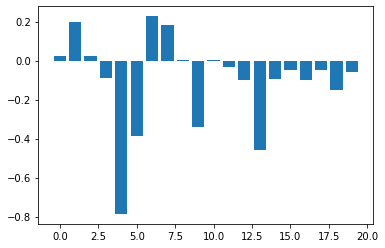

Obeležje koje najviše utiče na model je peto obeležje, odnosno obeležje time_zone_source1.



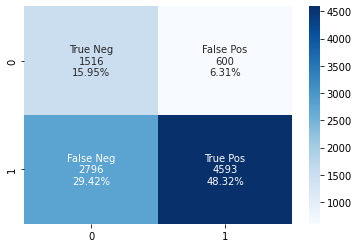

In [35]:
#Učitavanje potrebnih biblioteka za model i računanje metrika
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Definisanje modela i obučavanje na trening podacima modela prvog reda bez regularizacije
lr=LogisticRegression(C=1e5,class_weight='balanced')
lr.fit(X1train,Y1train)

#Predikcija na trening i test skupu i prikaz performansi modela
Y1trainpred=lr.predict(X1train)
Y1testpred=lr.predict(X1test)
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y1trainpred,Y1train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y1testpred,Y1test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y1trainpred,Y1train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y1testpred,Y1test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y1trainpred,Y1train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y1testpred,Y1test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y1trainpred,Y1train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y1testpred,Y1test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y1trainpred,Y1train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y1testpred,Y1test)*100,'%')
print()
print('Feature importance:')

#Računanje obeležja koje najviše utiče na performanse modela
importance =lr.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()


#Prikaz dobijenog najbitnijeg obeležja
print('Obeležje koje najviše utiče na model je peto obeležje, odnosno obeležje time_zone_source1.')
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y1test,Y1testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Dobijeni rezultati su korektni, ali nisu zadovoljavajući. F1 Score na test skupu iznosi oko 73% što nije sjajno. Ovi rezultati su i očekivani kada je u pitanju logistička regresija jer ona inače radi bolje za numerička obeležja, dok za kategorička obeležja bolje rade algoritmi koji će biti razmatrani dalje. Kao performansa posmatrane su performanse klase FRAUD zato što nam je to bitnija klasa, bitnije je da odredimo da li je došlo do pojave prevare, pa makar i malo omanuli, nego da nam promakne neka prevara. Kao zamena za ovo, mogla se koristiti objedinjena performansa u kojoj se gledaju obe klase.

# Decision Tree model

Decision Tree model predstavlja model stabla odlučivanja. Stabla odlučivanja imaju prednost u odnosu na ostale algoritme zato što su interpretabilna, prosta, brza i interkativna, možemo lako objasniti nekome kako smo došli do rezultata na osnovu prikaza nekog od stabala. Loša stvar kod stabala odlučivanja je što su sklona preobučavanju, imaju veliku varijansu, ali za veliki broj problema daju dobre rezultate. U ovom slučaju koristiće se ugrađena funkcija **sklearn.tree.DecisionTreeClassifier()**. U svakom sloju bira se ona odluka čija je Džinijeva nečistoća najmanja ili ako gledamo entropiju, ona čija je entropija najmanja. Možemo ograničiti dubinu stabla i tako sprečiti preobučavanje, možemo prestati sa obučavanjem ako vidimo da se Džinijeva nečistoća ili entropija znatno ne smanjuje ili ako smo dostigli željeni broj listova u stablu i slično.

$$GI=1-\sum_{i=1}^{n}(p_{i})^2$$

$$Entropy=-\sum_{j}p_{j}log_{2}p_{j}$$

Najpre pokrećemo algoritam za različite dubine kako bi krosvalidacijom izabrali najbolju dubinu stabla.

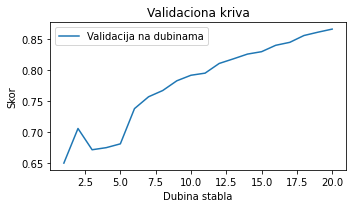

In [37]:
#Učitavanje biblioteke za rad sa stablom učenja
from sklearn import tree
from sklearn.model_selection import cross_val_score

#Krosvalidacija različitim dubinama i prikaz validacione krive takvih modela
plt.figure(figsize=(5,3))
depths=np.linspace(1,20,20)
scores=[cross_val_score(tree.DecisionTreeClassifier(class_weight='balanced',max_depth=dubina,criterion='gini'),X1train,Y1train,cv=5,scoring='f1').mean() for dubina in depths]
plt.plot(depths,scores, label='Validacija na dubinama')
plt.legend(loc='best')
plt.title('Validaciona kriva')
plt.xlabel('Dubina stabla')
plt.ylabel('Skor')
plt.tight_layout()
plt.show()

Sa datog grafika može se izvesti zaključak da on nije preterano informativan, što je i neretko slučaj kada su u pitanju realni problemi, stoga će performanse biti ispitane na više dubina, gde će se kao najbolja dubina izabrati ona koja ima najbolje performanse, a tako da ne dolazi do preobučavanja stabla.

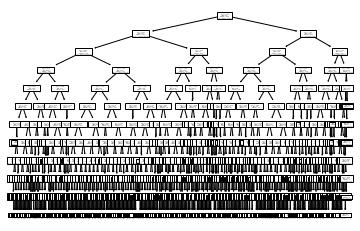

Tačnost na obučavajućem skupu je:  76.32236513322286 %
Tačnost na test skupu je:  73.36138874276696 %
Precision na obučavajućem skupu je:  73.91054269860604 %
Precision na test skupu je:  72.22898903775882 %
Recall na obučavajućem skupu je:  94.41995159059474 %
Recall na test skupu je:  91.74832387828778 %
F1 Score na obučavajućem skupu je:  82.91581264708115 %
F1 Score na test skupu je:  80.82689686506133 %
AUROC Score na obučavajućem skupu je:  71.30458037770684 %
AUROC Score na test skupu je:  68.05420532309184 %

Feature: 0, Score: 0.05915
Feature: 1, Score: 0.43092
Feature: 2, Score: 0.06778
Feature: 3, Score: 0.02663
Feature: 4, Score: 0.04648
Feature: 5, Score: 0.23359
Feature: 6, Score: 0.00220
Feature: 7, Score: 0.02187
Feature: 8, Score: 0.00315
Feature: 9, Score: 0.02037
Feature: 10, Score: 0.01114
Feature: 11, Score: 0.00220
Feature: 12, Score: 0.04734
Feature: 13, Score: 0.00026
Feature: 14, Score: 0.00499
Feature: 15, Score: 0.00538
Feature: 16, Score: 0.00331
Feature: 17

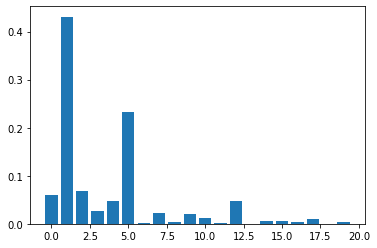

Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.



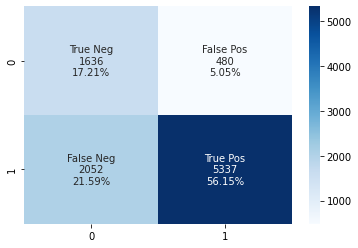

In [38]:
#Definisanje najboljeg modela dubine 11 sa kriterijumom entropije i treniranje modela
clf=tree.DecisionTreeClassifier(class_weight='balanced',max_depth=11,criterion='gini')
clf=clf.fit(X1train,Y1train)

#Prikaz dobijenog stabla
plt.figure()
tree.plot_tree(clf)
Y1trainpred=clf.predict(X1train)
Y1testpred=clf.predict(X1test)
plt.show()

#Prikaz performansi dobijenih predikcijom istreniranog modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y1trainpred,Y1train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y1testpred,Y1test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y1trainpred,Y1train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y1testpred,Y1test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y1trainpred,Y1train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y1testpred,Y1test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y1trainpred,Y1train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y1testpred,Y1test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y1trainpred,Y1train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y1testpred,Y1test)*100,'%')
print()

#Računanje i prikaz obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y1test,Y1testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Kao najbolja dubina izabrana je dubina 11, dok je obeležje koje najviše utiče na performanse algoritma obeležje country_iso2_labels. Na samom kraju prikazana je i konfuziona matrica. F1 Score na test skupu ovog algoritma iznosi oko 80% što su bolje performanse nego u prethodnom modelu logističke regresije.

# Random Forest

Random Forest je bagging algoritam koji se bazira na generisanju slučajnih šuma sastavljenih od prethodno pomenutih stabala i to tako što se svakoj od šuma prosleđuje drugačiji sklop obeležja na kojima se obučavaju, čime se dobijaju jaki učenici, ali slab ansambl. Kao najbolja dubina izabrana je dubina 11, dok su klase izbalansirane. Rezultati se mogu videti ispod.

Tačnost na obučavajućem skupu je:  75.643757068834 %
Tačnost na test skupu je:  72.87743293003682 %
Precision na obučavajućem skupu je:  71.59290837731763 %
Precision na test skupu je:  69.35985925023684 %
Recall na obučavajućem skupu je:  96.07700690156193 %
Recall na test skupu je:  94.22687994116565 %
F1 Score na obučavajućem skupu je:  82.04730515703761 %
F1 Score na test skupu je:  79.90333645151232 %
AUROC Score na obučavajućem skupu je:  71.79280166897415 %
AUROC Score na test skupu je:  69.27281035917112 %

Feature: 0, Score: 0.06397
Feature: 1, Score: 0.29732
Feature: 2, Score: 0.12393
Feature: 3, Score: 0.04953
Feature: 4, Score: 0.12193
Feature: 5, Score: 0.09902
Feature: 6, Score: 0.03166
Feature: 7, Score: 0.04982
Feature: 8, Score: 0.01139
Feature: 9, Score: 0.01670
Feature: 10, Score: 0.01889
Feature: 11, Score: 0.00936
Feature: 12, Score: 0.05241
Feature: 13, Score: 0.00917
Feature: 14, Score: 0.01186
Feature: 15, Score: 0.00740
Feature: 16, Score: 0.00402
Feature: 17, 

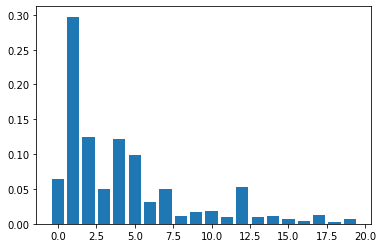

Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.



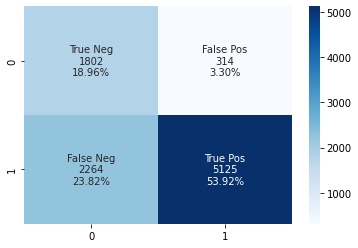

In [39]:
#Učitavanje potrebne biblioteke za rad sa Gradient Boosting modelom
from sklearn.ensemble import RandomForestClassifier

#Definisanje modela dubine 11 sa 60 estimatora i njegovo obučavanje na trening skupu
clf=RandomForestClassifier(n_estimators=60,max_depth=11,class_weight='balanced')
clf=clf.fit(X1train,Y1train)

#Predikcija istreniranog modela na trening i test skupu i prikaz performansi
Y1trainpred=clf.predict(X1train)
Y1testpred=clf.predict(X1test)

print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y1trainpred,Y1train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y1testpred,Y1test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y1trainpred,Y1train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y1testpred,Y1test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y1trainpred,Y1train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y1testpred,Y1test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y1trainpred,Y1train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y1testpred,Y1test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y1trainpred,Y1train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y1testpred,Y1test)*100,'%')
print()

#Računanje obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y1test,Y1testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad prikazana je konfuziona matrica algoritma. Obeležje koje najviše utiče na performanse algoritma je ponovo obeležje country_iso2_labels. F1 Score na test skupu iznosi nešto više od 80% što su približne performanse prethodnog algoritma.

# Gradient Boosting

Gradient Boosting algoritam predstavlja jedan od boosting metoda koja se zasnivaju na sekvencijalnom razvijanju rešenja, odnosno svaki sledeći segment zavisi od onog prethodnog i teži da popravi njegove performanse. Kako ugrađena funkcija nema mogućnost balansiranja klasa, klase su veštački izbalansirane u razmeri 1:3 po ugledu na univarijantnu analizu izlazne labele. Izabrana dubina algoritma je 7.

Tačnost na obučavajućem skupu je:  77.17194034561666 %
Tačnost na test skupu je:  74.5502367175171 %
Precision na obučavajućem skupu je:  74.63459196102315 %
Precision na test skupu je:  72.72973338746786 %
Recall na obučavajućem skupu je:  94.91416032012393 %
Recall na test skupu je:  93.0079612322603 %
F1 Score na obučavajućem skupu je:  83.56156599806808 %
F1 Score na test skupu je:  81.62831320726056 %
AUROC Score na obučavajućem skupu je:  72.09167212108511 %
AUROC Score na test skupu je:  69.47151482595038 %

Feature: 0, Score: 0.07029
Feature: 1, Score: 0.41652
Feature: 2, Score: 0.06617
Feature: 3, Score: 0.04094
Feature: 4, Score: 0.04536
Feature: 5, Score: 0.23307
Feature: 6, Score: 0.00266
Feature: 7, Score: 0.01968
Feature: 8, Score: 0.00500
Feature: 9, Score: 0.02047
Feature: 10, Score: 0.00913
Feature: 11, Score: 0.00358
Feature: 12, Score: 0.03926
Feature: 13, Score: 0.00425
Feature: 14, Score: 0.00513
Feature: 15, Score: 0.00326
Feature: 16, Score: 0.00282
Feature: 17, 

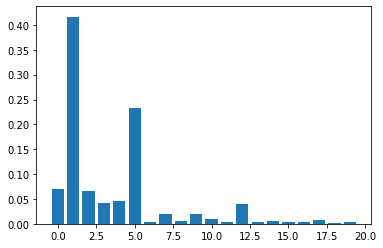

Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.



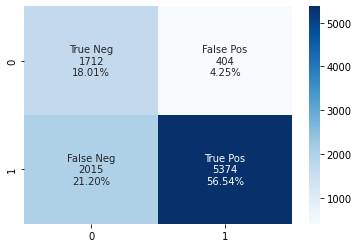

In [40]:
#Učitavanje potrebne biblioteke za rad sa Gradient Boosting modelom
from sklearn.ensemble import GradientBoostingClassifier

#Otežinjavanje klasa
w1=1
w0=3
sample_weights=np.zeros(len(Y1train))
sample_weights[Y1train == 0] = w0
sample_weights[Y1train == 1] = w1

#Definisanje modela dubine 7 sa 60 estimatora i njegovo obučavanje na trening skupu
clf=GradientBoostingClassifier(n_estimators=60,max_depth=7)
clf=clf.fit(X1train,Y1train,sample_weights)

#Predikcija istreniranog modela na trening i test skupu i prikaz performansi
Y1trainpred=clf.predict(X1train)
Y1testpred=clf.predict(X1test)

print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y1trainpred,Y1train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y1testpred,Y1test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y1trainpred,Y1train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y1testpred,Y1test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y1trainpred,Y1train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y1testpred,Y1test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y1trainpred,Y1train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y1testpred,Y1test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y1trainpred,Y1train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y1testpred,Y1test)*100,'%')
print()

#Računanje obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y1test,Y1testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad prikazana je konfuziona matrica koja je dobijena. Obeležje koje najviše utiče na performanse algoritma je country_iso2_labels. F1 Score na test skupu iznosi oko 82% što je ujedno i najbolji rezultat među posmatranim algoritmima.

# K Nearest Neighbours

KNN algoritam predstavlja algoritam k najbližih suseda. Klasifikacija se vrši na osnovu posmatranja najbližih primera i na osnovu toga koje klase u primerima ima više, toj klasi se dati primer dodeljuje. Ovaj algoritam, takođe, nema mogućnost balansiranja klasa, osim dodavanja težina primerima u vidu rastojanja od posmatranog primera, stoga je ovaj algoritam primer loše primene, jer daje prividno dobre rezultate koji nisu merodavni.

Tačnost na obučavajućem skupu je:  81.52239669638864 %
Tačnost na test skupu je:  78.47448711204629 %
Precision na obučavajućem skupu je:  94.962105832995 %
Precision na test skupu je:  93.07078089051292 %
Recall na obučavajućem skupu je:  83.52528048090944 %
Recall na test skupu je:  81.76197836166924 %
F1 Score na obučavajućem skupu je:  88.87727798096866 %
F1 Score na test skupu je:  87.05063291139241 %
AUROC Score na obučavajućem skupu je:  74.90349168973009 %
AUROC Score na test skupu je:  67.48062355012163 %



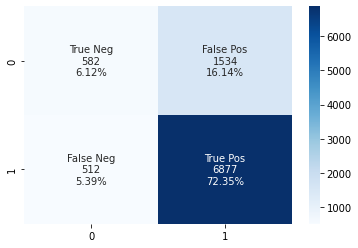

In [41]:
#Učitavanje potrebne biblioteke za korišćenje KNN klasifikatora
from sklearn.neighbors import KNeighborsClassifier

#Obučavanje KNN klasifikatora
nknn=KNeighborsClassifier(n_neighbors=15)
nknn=nknn.fit(X1train,Y1train)
Y1trainpred=nknn.predict(X1train)
Y1testpred=nknn.predict(X1test)

#Prikaz performansi modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y1trainpred,Y1train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y1testpred,Y1test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y1trainpred,Y1train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y1testpred,Y1test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y1trainpred,Y1train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y1testpred,Y1test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y1trainpred,Y1train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y1testpred,Y1test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y1trainpred,Y1train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y1testpred,Y1test)*100,'%')
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y1test,Y1testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Kao parametar k izabran je 15. Na slici iznad prikazana je konfuziona matrica algoritma. F1 Score iznosi oko 87%, ali ovaj rezultat nije dobar jer se ovde radi o nebalansiranim klasama koje nisu ni na koji način tretirane, stoga je veća verovatnoća da se nađe više primera u okolini posmatranog primera koji pripadaju klasi fraud jer njih ima 3 puta više. Ovaj algoritam razmatran je samo kao loša primena na ovakav vid problema.

# Support Vector Machines

Cilj zadatka je naći jednačinu separacione prave:

$$w^Tx+b=0$$

tako da dobijemo sto bolju klasifikaciju podataka, a odgovarajuca hipoteza se dobija kao:

$$
h(x) = \operatorname{sign}\left( \omega^T x + b \right).
$$
gde se parametri $\omega$ i $b$ separacione prave $\omega^T x + b = 0$ mogu naci minimizacijom $\omega$ i to tako:
$$
\min_{\omega, b} \frac{1}{2}\|\omega\|^2 \quad \text{pod uslovom}\quad y^{(i)}(\omega^T x^{(i)} + b) \ge 1, \ i=1, \ldots, m.
$$


Kad je u pitanju algoritam SVM, razmatrana je opcija linearnog, polinomijalnog i Gausovog kernela sa balansiranim klasama. Kao najbolji od ova 3 slučaja pokazao se Gausov kernel koji je davao najbolje performanse.

Tačnost na obučavajućem skupu je:  69.21539230384808 %
Tačnost na test skupu je:  67.89058390320884 %
Precision na obučavajućem skupu je:  66.28095818107998 %
Precision na test skupu je:  65.08323183110029 %
Recall na obučavajućem skupu je:  91.85108777194299 %
Recall na test skupu je:  91.06229880704412 %
F1 Score na obučavajućem skupu je:  76.99866362707336 %
F1 Score na test skupu je:  75.91160220994475 %
AUROC Score na obučavajućem skupu je:  66.07113132830568 %
AUROC Score na test skupu je:  64.99137667624933 %



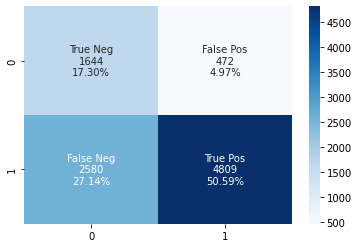

In [42]:
#Učitavanje potrebne biblioteke za rad sa SVM
from sklearn import svm

#Obučavanje modela SVM i predikcija
clf = svm.SVC(kernel='rbf',class_weight='balanced')
clf.fit(X1train,Y1train)
Y1trainpred=clf.predict(X1train)
Y1testpred=clf.predict(X1test)

#Prikaz performansi modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y1trainpred,Y1train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y1testpred,Y1test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y1trainpred,Y1train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y1testpred,Y1test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y1trainpred,Y1train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y1testpred,Y1test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y1trainpred,Y1train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y1testpred,Y1test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y1trainpred,Y1train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y1testpred,Y1test)*100,'%')
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y1test,Y1testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad prikazana je konfuziona matrica algoritma. F1 Score na test skupu ovog algoritma je oko 76%, što je nešto lošije od prethodnih algoritama na bazi stabala.

# Zaključak - Prva grupa obeležja

Na osnovu dosadašnje analize modela, dolazi se do zaključka da je najbolji iskorišćeni model Gradient Boosting algoritam, pri čemu i Random Forest i Decision Tree daju slične rezultate, dok su SVM i Logistička regresija nešto lošiji što se i očekivalo jer su obeležja bila pretežno kategorička kasnije transformisana u pogodne oblike. KNN model se ne uzima u razmatranje.

# Izbor modela - Druga grupa obeležja

Na samom početku radi se podela podataka na trening i test skup, kao i standardizacija podataka, kao i u prethodnom slučaju.

In [43]:
#Biblioteke za podelu podataka i standardizaciju
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Podesavamo fraud klasu na 1
y2_final=1-y2_final

#Podela na trening i test skup podataka
X2train,X2test,Y2train,Y2test=train_test_split(X2_final,y2_final, test_size=0.2, random_state=4,stratify=y2_final)

#Standardizacija podataka statističkim parametrima trening skupa
scaler = StandardScaler()
X2train=scaler.fit_transform(X2train)
X2test=scaler.transform(X2test)

Dimenzije trening i test skupa

In [44]:
#Dimenzije trening i test skupa
print('Dimenzije trening skupa: '+str(X2train.shape))
print('Dimenzije test skupa: '+str(X2test.shape))

Dimenzije trening skupa: (38019, 13)
Dimenzije test skupa: (9505, 13)


# Logistička regresija

Kao i u prethodnom slučaju, korišćeni model je model prvog reda bez regularizacije.

Tačnost na obučavajućem skupu je:  63.87858702227833 %
Tačnost na test skupu je:  63.661230931088895 %
Precision na obučavajućem skupu je:  61.85546082013804 %
Precision na test skupu je:  61.49681959669779 %
Recall na obučavajućem skupu je:  88.1442553396654 %
Recall na test skupu je:  88.18164176208035 %
F1 Score na obučavajućem skupu je:  72.69618466310118 %
F1 Score na test skupu je:  72.46053261042896 %
AUROC Score na obučavajućem skupu je:  61.44682381521991 %
AUROC Score na test skupu je:  61.40469955751075 %

Feature importance:
Feature: 0, Score: -0.01687
Feature: 1, Score: 0.27503
Feature: 2, Score: -0.31767
Feature: 3, Score: 0.39259
Feature: 4, Score: -0.05833
Feature: 5, Score: 0.04450
Feature: 6, Score: -0.05474
Feature: 7, Score: 0.03947
Feature: 8, Score: -0.07861
Feature: 9, Score: 0.16495
Feature: 10, Score: 0.07979
Feature: 11, Score: 0.13615
Feature: 12, Score: -0.02663


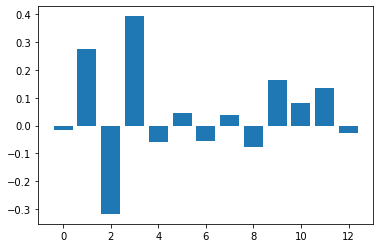

Obeležje koje najviše utiče na model je četvrto obeležje, odnosno obeležje North America.



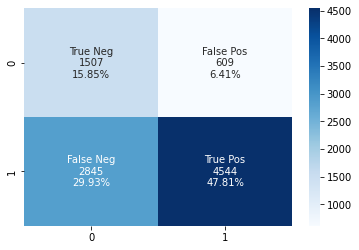

In [45]:
#Definisanje modela i obučavanje na trening podacima modela prvog reda bez regularizacije
lr=LogisticRegression(C=1e5,class_weight='balanced')
lr.fit(X2train,Y2train)

#Predikcija na trening i test skupu i prikaz performansi modela
Y2trainpred=lr.predict(X2train)
Y2testpred=lr.predict(X2test)
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y2trainpred,Y2train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y2testpred,Y2test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y2trainpred,Y2train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y2testpred,Y2test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y2trainpred,Y2train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y2testpred,Y2test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y2trainpred,Y2train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y2testpred,Y2test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y2trainpred,Y2train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y2testpred,Y2test)*100,'%')
print()
print('Feature importance:')

#Računanje obeležja koje najviše utiče na performanse modela
importance =lr.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()


#Prikaz dobijenog najbitnijeg obeležja
print('Obeležje koje najviše utiče na model je četvrto obeležje, odnosno obeležje North America.')
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y2test,Y2testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad nalazi se konfuziona matrica algoritma. Obeležje koje najviše utiče na performanse algoritma je North America. F1 Score na test skupu iznosi oko 72% što nije baš sjajan rezultat.

# Decision Tree

Najpre se radi krosvalidacija dubine stabla kako bi se izabralo stablo odgovarajuće dubine.

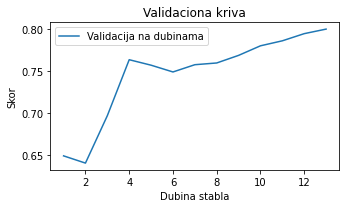

In [46]:
#Krosvalidacija različitim dubinama i prikaz validacione krive takvih modela
plt.figure(figsize=(5,3))
depths=np.linspace(1,13,13)
scores=[cross_val_score(tree.DecisionTreeClassifier(class_weight='balanced',max_depth=dubina,criterion='gini'),X2train,Y2train,cv=5,scoring='f1').mean() for dubina in depths]
plt.plot(depths,scores, label='Validacija na dubinama')
plt.legend(loc='best')
plt.title('Validaciona kriva')
plt.xlabel('Dubina stabla')
plt.ylabel('Skor')
plt.tight_layout()
plt.show()

Kao i u prethodnom slučaju, grafik nam ne donosi previše informacija, pa se adekvatna dubina dobija kao ona koja daje najbolje performanse,a da ne dolazi do preobučavanja algoritma. Izabrana dubina je 4. Klase su izbalansirane.

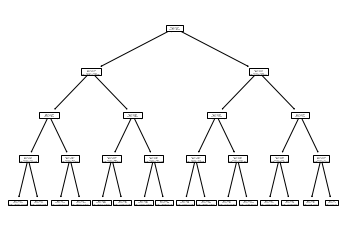

Tačnost na obučavajućem skupu je:  69.75459638601752 %
Tačnost na test skupu je:  69.52130457653867 %
Precision na obučavajućem skupu je:  66.86967113276492 %
Precision na test skupu je:  66.63959940452024 %
Recall na obučavajućem skupu je:  92.04974151180663 %
Recall na test skupu je:  91.93427931292008 %
F1 Score na obučavajućem skupu je:  77.46487153859721 %
F1 Score na test skupu je:  77.26951745782661 %
AUROC Score na obučavajućem skupu je:  66.4382137580788 %
AUROC Score na test skupu je:  66.26118641471504 %

Feature: 0, Score: 0.01536
Feature: 1, Score: 0.55070
Feature: 2, Score: 0.04136
Feature: 3, Score: 0.34058
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00163
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.04154
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00883
Feature: 12, Score: 0.00000


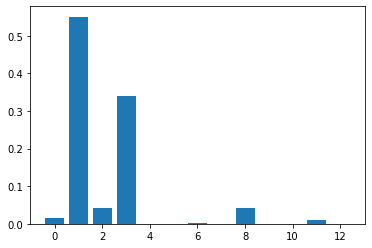

Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.



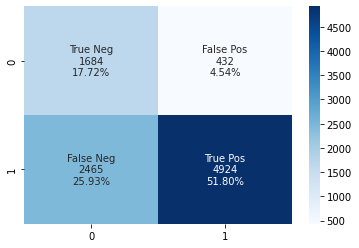

In [47]:
#Definisanje najboljeg modela dubine 4 sa kriterijumom entropije i treniranje modela
clf=tree.DecisionTreeClassifier(class_weight='balanced',max_depth=4,criterion='gini')
clf=clf.fit(X2train,Y2train)

#Prikaz dobijenog stabla
plt.figure()
tree.plot_tree(clf)
Y2trainpred=clf.predict(X2train)
Y2testpred=clf.predict(X2test)
plt.show()

#Prikaz performansi dobijenih predikcijom istreniranog modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y2trainpred,Y2train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y2testpred,Y2test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y2trainpred,Y2train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y2testpred,Y2test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y2trainpred,Y2train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y2testpred,Y2test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y2trainpred,Y2train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y2testpred,Y2test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y2trainpred,Y2train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y2testpred,Y2test)*100,'%')
print()

#Računanje i prikaz obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y2test,Y2testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad prikazana je konfuziona matrica algoritma. Obeležje koje najviše utiče na performanse algoritma je country_iso2_labels. F1 Score na test skupu iznosi oko 77% što su nešto bolji rezultati nego kod modela logističke regresije.

# Random Forest

Izabrana dubina algoritma je 8 kao dubina sa najboljim performansama pri kojim ne dolazi do preobučavanja algoritma. Klase su izbalansirane.

Tačnost na obučavajućem skupu je:  70.94873615823667 %
Tačnost na test skupu je:  70.28932140978432 %
Precision na obučavajućem skupu je:  66.73095141426445 %
Precision na test skupu je:  66.17945594803085 %
Recall na obučavajućem skupu je:  94.21065201815142 %
Recall na test skupu je:  93.7679769894535 %
F1 Score na obučavajućem skupu je:  78.12481432334476 %
F1 Score na test skupu je:  77.59441447159632 %
AUROC Score na obučavajućem skupu je:  68.32693687304199 %
AUROC Score na test skupu je:  67.75811436885262 %

Feature: 0, Score: 0.05925
Feature: 1, Score: 0.38235
Feature: 2, Score: 0.19543
Feature: 3, Score: 0.14945
Feature: 4, Score: 0.03242
Feature: 5, Score: 0.02323
Feature: 6, Score: 0.04271
Feature: 7, Score: 0.01525
Feature: 8, Score: 0.02778
Feature: 9, Score: 0.02258
Feature: 10, Score: 0.02664
Feature: 11, Score: 0.00963
Feature: 12, Score: 0.01329


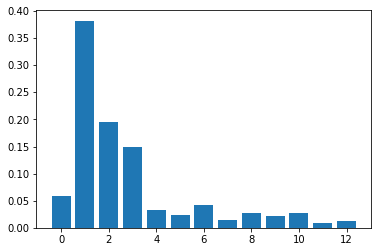

Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.



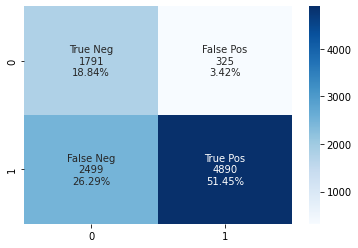

In [48]:
#Definisanje modela dubine 8 sa 60 estimatora i njegovo obučavanje na trening skupu
clf=RandomForestClassifier(n_estimators=60,max_depth=8,class_weight='balanced')
clf=clf.fit(X2train,Y2train)

#Predikcija istreniranog modela na trening i test skupu i prikaz performansi
Y2trainpred=clf.predict(X2train)
Y2testpred=clf.predict(X2test)

#Prikaz performansi modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y2trainpred,Y2train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y2testpred,Y2test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y2trainpred,Y2train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y2testpred,Y2test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y2trainpred,Y2train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y2testpred,Y2test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y2trainpred,Y2train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y2testpred,Y2test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y2trainpred,Y2train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y2testpred,Y2test)*100,'%')
print()

#Računanje obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y2test,Y2testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad nalazi se konfuziona matrica algoritma. Obeležje koje najviše utiče na performanse algoritma je country_iso2_labels. F1 Score na test skupu iznosi oko 77% što su slične performanse kao u prethodnom algoritmu.

# Gradient Boosting

Kao i u prethodnom slučaju, ugrađena funkcija nema mogućnost balansiranja klasa, pa su klase izbalansirane na drugi način. Izabrana dubina algoritma je 5. Rezultati koji su dobijeni prikazani su ispod.

Tačnost na obučavajućem skupu je:  72.74783660801178 %
Tačnost na test skupu je:  71.90952130457654 %
Precision na obučavajućem skupu je:  69.75233455136014 %
Precision na test skupu je:  68.96738394911355 %
Recall na obučavajućem skupu je:  93.55175386849389 %
Recall na test skupu je:  93.11163895486936 %
F1 Score na obučavajućem skupu je:  79.91781830868527 %
F1 Score na test skupu je:  79.24117555590111 %
AUROC Score na obučavajućem skupu je:  68.8069118485255 %
AUROC Score na test skupu je:  68.12079963616485 %

Feature: 0, Score: 0.04669
Feature: 1, Score: 0.49911
Feature: 2, Score: 0.08200
Feature: 3, Score: 0.27487
Feature: 4, Score: 0.01123
Feature: 5, Score: 0.01052
Feature: 6, Score: 0.01664
Feature: 7, Score: 0.00790
Feature: 8, Score: 0.01719
Feature: 9, Score: 0.00155
Feature: 10, Score: 0.01610
Feature: 11, Score: 0.00873
Feature: 12, Score: 0.00746


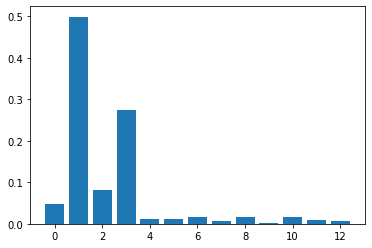

Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.



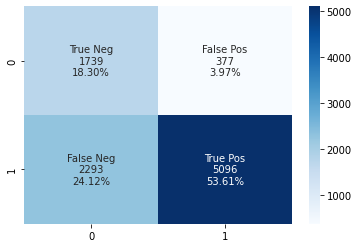

In [49]:
#Otežinjavanje klasa
w1=1
w0=3
sample_weights=np.zeros(len(Y2train))
sample_weights[Y2train == 0] = w0
sample_weights[Y2train == 1] = w1

#Definisanje modela dubine 5 sa 60 estimatora i njegovo obučavanje na trening skupu
clf=GradientBoostingClassifier(n_estimators=60,max_depth=5)
clf=clf.fit(X2train,Y2train,sample_weights)

#Predikcija istreniranog modela na trening i test skupu i prikaz performansi
Y2trainpred=clf.predict(X2train)
Y2testpred=clf.predict(X2test)

#Prikaz performansi modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y2trainpred,Y2train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y2testpred,Y2test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y2trainpred,Y2train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y2testpred,Y2test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y2trainpred,Y2train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y2testpred,Y2test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y2trainpred,Y2train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y2testpred,Y2test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y2trainpred,Y2train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y2testpred,Y2test)*100,'%')
print()

#Računanje obeležja koje najviše utiče na performanse modela
plt.figure()
importance=clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Najveći uticaj na stablo odlučivanja ima drugo obeležje 'country_iso2_labels'.")
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y2test,Y2testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici je prikazana konfuziona matrica algoritma. Obeležje koje najviše utiče na performanse algoritma je country_iso2_labels. F1 Score na test skupu iznosi oko 79% što je ujedno i najbolji rezultat od svih algoritama koji se posmatraju u drugoj grupi obeležja.

# K Nearest Neighbours

Kao i u prethodnom slučaju, ovaj algoritam služi samo kao loš primer primene na ovakav tip problema. Klase su nebalansirane, pa samim tim performanse algoritma nisu merodavne. Kao najbolji parametar k izabran je parametar 15.

Tačnost na obučavajućem skupu je:  81.6933638443936 %
Tačnost na test skupu je:  79.11625460284061 %
Precision na obučavajućem skupu je:  95.26999593991067 %
Precision na test skupu je:  93.82866423061307 %
Recall na obučavajućem skupu je:  83.50533807829181 %
Recall na test skupu je:  81.93098558260459 %
F1 Score na obučavajućem skupu je:  89.00056893608951 %
F1 Score na test skupu je:  87.47713078039241 %
AUROC Score na obučavajućem skupu je:  75.49307378443551 %
AUROC Score na test skupu je:  69.10547361584689 %



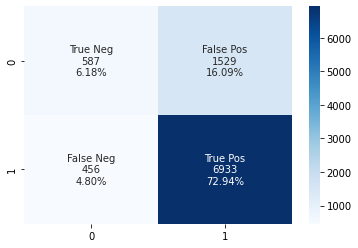

In [50]:
#Obučavanje modela KNN i predikcija
nknn=KNeighborsClassifier(n_neighbors=15)
nknn=nknn.fit(X2train,Y2train)
Y2trainpred=nknn.predict(X2train)
Y2testpred=nknn.predict(X2test)

#Prikaz performansi modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y2trainpred,Y2train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y2testpred,Y2test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y2trainpred,Y2train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y2testpred,Y2test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y2trainpred,Y2train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y2testpred,Y2test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y2trainpred,Y2train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y2testpred,Y2test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y2trainpred,Y2train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y2testpred,Y2test)*100,'%')
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y2test,Y2testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad prikazana je konfuziona matrica algoritma. F1 Score na test skupu iznosi oko 87% što bi bio najbolji rezultat da je ovaj algoritam merodavan skroz za procenu. Sudeći po tome da imamo dosta više podataka iz klase FRAUD veća je verovatnoća da se u oblasti k najbližih suseda nađe više primera te klase i tako se dati primeri pridruže njoj, čime se dobija prividno velika tačnost algoritma.

# Support Vector Machines

Kao i u prethodnom slučaju, najbolji izabrani model je SVM sa Guasovim kernelom gde su klase izbalansirane. Rezultati koji su dobijeni nalaze se ispod.

Tačnost na obučavajućem skupu je:  69.57573844656619 %
Tačnost na test skupu je:  69.05839032088375 %
Precision na obučavajućem skupu je:  67.96927865746379 %
Precision na test skupu je:  67.43808363784002 %
Recall na obučavajućem skupu je:  90.53585109739059 %
Recall na test skupu je:  90.30445813700616 %
F1 Score na obučavajućem skupu je:  77.64614938641414 %
F1 Score na test skupu je:  77.213914929883 %
AUROC Score na obučavajućem skupu je:  65.36584089929542 %
AUROC Score na test skupu je:  64.97916661553091 %



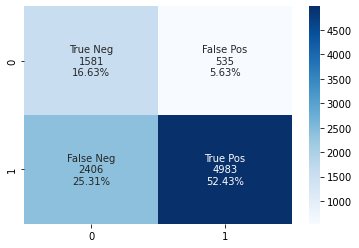

In [51]:
#Obučavanje modela SVM i predikcija
clf = svm.SVC(kernel='rbf',class_weight='balanced')
clf.fit(X2train,Y2train)
Y2trainpred=clf.predict(X2train)
Y2testpred=clf.predict(X2test)

#Prikaz performansi modela
print('Tačnost na obučavajućem skupu je: ',accuracy_score(Y2trainpred,Y2train)*100,'%')
print('Tačnost na test skupu je: ',accuracy_score(Y2testpred,Y2test)*100,'%')
print('Precision na obučavajućem skupu je: ',precision_score(Y2trainpred,Y2train)*100,'%')
print('Precision na test skupu je: ',precision_score(Y2testpred,Y2test)*100,'%')
print('Recall na obučavajućem skupu je: ',recall_score(Y2trainpred,Y2train)*100,'%')
print('Recall na test skupu je: ',recall_score(Y2testpred,Y2test)*100,'%')
print('\033[1mF1 Score na obučavajućem skupu je: ',f1_score(Y2trainpred,Y2train)*100,'%\033[0m')
print('\033[1mF1 Score na test skupu je: ',f1_score(Y2testpred,Y2test)*100,'%\033[0m')
print('AUROC Score na obučavajućem skupu je: ',roc_auc_score(Y2trainpred,Y2train)*100,'%')
print('AUROC Score na test skupu je: ',roc_auc_score(Y2testpred,Y2test)*100,'%')
print()

#Računanje i prikaz konfuzione matrice
konfmatrica=confusion_matrix(Y2test,Y2testpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                konfmatrica.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      konfmatrica.flatten()/np.sum(konfmatrica)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(konfmatrica, annot=labels, fmt='', cmap='Blues')

Na slici iznad nalazi se konfuziona matrica algoritma. F1 Score na test skupu iznosi oko 77% što su nešto lošije performanse nego kod Gradient Boosting algoritma, ali približne ostalim algoritmima.

# Zaključak - Druga grupa obeležja

Kao i u slučaju prve grupe obeležja, izvodi se zaključak da je najbolji algoritam Gradient Boosting algoritam koji daje nešto bolje perfromanse od ostalih algoritama. Najlošiji algoritam je logistička regresija, što se moglo i očekivati s obzirom na prirodu obeležja.

# Celokupni zaključak

Na osnovu cele analize ovog problema može se izvesti zaključak da najbolje performanse daje Gradient Boosting algoritam za prvu grupu obeležja source1, iako performanse druge grupe obeležja source2 nisu mnogo lošije. Otprilike obe grupe rade slične stvari i slično se ponašaju i daju zadovoljavajuće rezultate. U proseku oko 80% performanse F1 Score može biti globalna procena uspešnosti ove dve grupe obeležja. Treba imati na umu da su obeležja prikupljena sa dva izvora i da bi se u budućnosti možda mogla i kombinovati i tako ostvariti neki bolji rezultati. Takođe, treba napomenuti da je većina obeležja analizirana i procesirana subjektivnim razmišljanjem i da možda nekim od obeležja nije posvećeno dovoljno pažnje usled nedostatka vremena. Svakako se u budućnosti može raditi na razvijanju novih obeležja i kombinovanju nekih od njih kako bi se dobili još bolji rezultati i performanse. Treba napomenuti da ovakav skup podataka u većini situacija u realnom problemu nije slučaj, zato što imamo mnogo više legitimnih transakcija, nego prevara, stoga je to problem ekstremno nebalansiranih klasa kome treba pristupati sa drugih strana. Kao još neka od mogućih nadgradnji ovog rešenja je mogućnost korišćenja duboke neuralne mreže koja zbog nedostatka vremena nije razmotrena, pa uporediti njene performanse sa performansama dobijenih modela i zaključiti koji od algoritama je najbolji.